# Pollution Emissions and Wage Growth by Industry
### by Cyrus Anderson
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>

## 1. Introduction
### Project Background
This is a basic data analysis project submitted as a course requirement for the Udacity Data Analyst Nanodegree program.
### Project Description
This project analyzes US Census Bureau GDP data, County Business Pattern data, and Enironmental Protection Agency (EPA) pollution data to estimate which industries produce the most pollution. Knowing which states have experienced the most growth in polluting industries can be helpful in focusing efforts for policy change to reduce pollution.

This analysis will also evaluate wage growth by industry. This project assumes that wage growth implies profitability. Profitable industries might be on better footing to invest in pollution reduction or can accommodate costs associated with regulatory compliance.
### Research Questions
1) Which industries are the most polluting? I will consider this on a kg / USD basis and on a total kg pollution basis.
2) Which states are experiencing the largest growth in these polluting industries (as indicated by GDP)?
3) Of the most polluting industries, which are experiencing growing wages? Which are experiencing shrinking wages?


<a id='wrangling'></a>

## 2. Data Wrangling
### 2.1. Load Datasets
#### 2.1.1. Annual County Business Patterns Data, 2017 - 2021

The County Business Patterns data available from the US Census Bureau shows trends in economic activity by industry and location, even down to city-level. This dataset includes information about the number of businesses, emloyee headcount, and payroll. These data allow evaluation of business trends like wage growth, hiring, and business formation.

The data were gathered by calling the US Census Bureau API at https://api.census.gov/data/. Datasets are in JSON format and are organized by year, so individual calls were made for each year's data.

Dataset variables:

*   NAICS2017 = 2, 3, 4, 5, & 6-digit 2017 NAICS industry classification codes
*   ESTAB = number of businesses
*   EMP = number of employees
*   PAYANN = annual payroll (thousands of USD)
*   State = FIPS code for state
*   Year = year

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import seaborn.objects as so
import seaborn as sns

In [2]:
# Load 2017 - 2021 County Business Patterns data
# Make 5 calls to the US Census Bureau API @ https://api.census.gov/data/
url = 'https://api.census.gov/data/2021/cbp?get=NAICS2017,ESTAB,EMP,PAYANN&for=state:*'
api_return = requests.get(url)
api_return.raise_for_status()
api_text_2021 = api_return.json()

url = 'https://api.census.gov/data/2020/cbp?get=NAICS2017,ESTAB,EMP,PAYANN&for=state:*'
api_return = requests.get(url)
api_return.raise_for_status()
api_text_2020 = api_return.json()

url = 'https://api.census.gov/data/2019/cbp?get=NAICS2017,ESTAB,EMP,PAYANN&for=state:*'
api_return = requests.get(url)
api_return.raise_for_status()
api_text_2019 = api_return.json()

url = 'https://api.census.gov/data/2018/cbp?get=NAICS2017,ESTAB,EMP,PAYANN&for=state:*'
api_return = requests.get(url)
api_return.raise_for_status()
api_text_2018 = api_return.json()

url = 'https://api.census.gov/data/2017/cbp?get=NAICS2017,ESTAB,EMP,PAYANN&for=state:*'
api_return = requests.get(url)
api_return.raise_for_status()
api_text_2017 = api_return.json()

# Qualitative check for sucessful read
print('DataSet Size:', len(api_text_2021), len(api_text_2020), len(api_text_2019), len(api_text_2018), len(api_text_2017))

DataSet Size: 88236 88097 88218 88187 88331


In [3]:
# Sample JSON from US Census Bureau County Business Pattern API
api_text_2021

[['NAICS2017', 'ESTAB', 'EMP', 'PAYANN', 'state'],
 ['00', '103514', '1719114', '86921205', '01'],
 ['11', '792', '6548', '322362', '01'],
 ['113', '568', '3976', '199244', '01'],
 ['1131', '55', '270', '15995', '01'],
 ['11311', '55', '270', '15995', '01'],
 ['113110', '55', '270', '15995', '01'],
 ['1132', '8', '42', '3357', '01'],
 ['11321', '8', '42', '3357', '01'],
 ['113210', '8', '42', '3357', '01'],
 ['1133', '505', '3664', '179892', '01'],
 ['11331', '505', '3664', '179892', '01'],
 ['113310', '505', '3664', '179892', '01'],
 ['114', '28', '133', '5346', '01'],
 ['1141', '18', '29', '999', '01'],
 ['11411', '18', '29', '999', '01'],
 ['114111', '5', '3', '109', '01'],
 ['114112', '11', '17', '646', '01'],
 ['1142', '10', '104', '4347', '01'],
 ['11421', '10', '104', '4347', '01'],
 ['114210', '10', '104', '4347', '01'],
 ['115', '196', '2439', '117772', '01'],
 ['1151', '41', '1547', '73086', '01'],
 ['11511', '41', '1547', '73086', '01'],
 ['115111', '15', '153', '9055', '01'

In [4]:
# Convert JSON to DataFrame, set column labels, reset index, insert year
df_2017 = pd.DataFrame(api_text_2017, columns = api_text_2017[0])
df_2017.drop(index = 0, axis = 0, inplace = True)
df_2017.reset_index(drop = True, inplace = True)
df_2017['YEAR'] = '2017'

df_2018 = pd.DataFrame(api_text_2018, columns = api_text_2018[0])
df_2018.drop(index = 0, axis = 0, inplace = True)
df_2018.reset_index(drop = True, inplace = True)
df_2018['YEAR'] = '2018'

df_2019 = pd.DataFrame(api_text_2019, columns = api_text_2019[0])
df_2019.drop(index = 0, axis = 0, inplace = True)
df_2019.reset_index(drop = True, inplace = True)
df_2019['YEAR'] = '2019'

df_2020 = pd.DataFrame(api_text_2020, columns = api_text_2020[0])
df_2020.drop(index = 0, axis = 0, inplace = True)
df_2020.reset_index(drop = True, inplace = True)
df_2020['YEAR'] = '2020'

df_2021 = pd.DataFrame(api_text_2021, columns = api_text_2021[0])
df_2021.drop(index = 0, axis = 0, inplace = True)
df_2021.reset_index(drop = True, inplace = True)
df_2021['YEAR'] = '2021'

In [5]:
# Concatenate all retreived data into one DataFrame (df_cbp)
df_cbp = pd.concat([df_2017, df_2018, df_2019, df_2020, df_2021], ignore_index = True)

In [6]:
# Sample view of 2017 - 2021 County Business Pattern DataFrame
# Note 441,064 entries; this is consistent with sucessful concatenation of all DataFrames
df_cbp

,NAICS2017,ESTAB,EMP,PAYANN,state,YEAR
0,424910,121,1076,58998,28,2017
1,42492,3,0,0,28,2017
2,424920,3,0,0,28,2017
3,4251,210,1540,61908,28,2017
4,42512,210,1540,61908,28,2017
...,...,...,...,...,...,...
441059,813930,476,3676,135281,48,2021
441060,81391,1099,6041,434027,48,2021
441061,813910,1099,6041,434027,48,2021
441062,813920,367,3340,273524,48,2021


In [7]:
# Write combined DataFrame to csv for later retrieval
df_cbp.to_csv('county_business_patterns_2017-2021.csv', index = False)

#### 2.1.2. Annual Seasonally Adjusted Gross Domestic Product Data

The GDP dataset from the Bureau of Economic Analysis contains reliable measurements of GDP by industry and location. The data is complete for the most recent calendar year and overlaps with recent EPA pollution data imported in the next sections.

The data is in csv format and was gathered by manual download from https://apps.bea.gov/regional/downloadzip.cfm

Relevant Dataset variables:

*   GeoFIPS = location ID code
*   GeoName = location name
*   IndustryClassification = 2, 3, & 4-digit 2012 NAICS classification codes
*   Description = 2012 NAICS classificaiton description
*   Year = year

In [8]:
# Read 1997-2022 Annual Seasonally Adjusted GDP data from https://apps.bea.gov/regional/downloadzip.cfm
# Data is organized by industry & GeoFIPS location
df_gdp = pd.read_csv('SAGDP2N__ALL_AREAS_1997_2022.csv')

# Sample DataFrame of GDP data
df_gdp

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1997,1998,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,"""00000""",United States *,,SAGDP2N,1.0,...,All industry total,Millions of current dollars,8577552.0,9062817.0,...,16843196.0,17550687.0,18206023.0,18695106.0,19477337.0,20533058.0,21380976.0,21060474.0,23315081.0,25462722.0
1,"""00000""",United States *,,SAGDP2N,2.0,...,Private industries,Millions of current dollars,7431992.0,7871500.0,...,14630684.0,15279313.0,15866579.0,16310916.0,17031697.0,17987542.0,18762520.0,18360184.0,20502200.0,22502353.0
2,"""00000""",United States *,,SAGDP2N,3.0,11,"Agriculture, forestry, fishing and hunting",Millions of current dollars,108637.0,99756.0,...,214286.0,198913.0,180138.0,165848.0,175433.0,174441.0,159493.0,162214.0,206568.0,288908.0
3,"""00000""",United States *,,SAGDP2N,4.0,111-112,Farms,Millions of current dollars,88136.0,79030.0,...,183261.0,165998.0,145229.0,129892.0,138885.0,135853.0,119835.0,120732.0,164706.0,(NA)
4,"""00000""",United States *,,SAGDP2N,5.0,113-115,"Forestry, fishing, and related activities",Millions of current dollars,20501.0,20726.0,...,31024.0,32914.0,34909.0,35956.0,36548.0,38588.0,39658.0,41482.0,41862.0,(NA)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5523,"""98000""",Far West,8,SAGDP2N,92.0,...,Private services-providing industries 3/,Millions of current dollars,985421.0,1063768.8,...,2138514.7,2245869.7,2392470.9,2504203.7,2656309.6,2830278.5,2993660.3,2967790.5,3353321.6,3580921.0
5524,Note: See the included footnote file.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5525,SAGDP2N: Gross domestic product (GDP) by state 1/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5526,"Last updated: March 31, 2023-- new statistics ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 2.1.3. Supply Chain GHG Emissions by Industry

The EPA GHG Emissions dataset is a reliable source of CO2 and other greenhouse gas emission factors of each industry classification in the US. This dataset is organized by NAICS industry code similar to the GDP and CBP economic data. This dataset aids in identifying which industries are more polluting than others by allowing determination of emission factors for any combination of NAICS industry codes.

The data is in csv format and was gathered by manual download from https://catalog.data.gov/dataset/supply-chain-greenhouse-gas-emission-factors-v1-2-by-naics-6

Relevant Dataset variables:

*   2017NAICSCODE = 6-digit 2017 NAICS classification code
*   Supply Chain Emission Factors with Margins = kg CO2 equivalents/2021 USD, purchaser price

In [9]:
#Read in manually downloaded csv file of Greenhouse Gas Emission Factors by NAICS classification
#Available from https://catalog.data.gov/dataset/supply-chain-greenhouse-gas-emission-factors-v1-2-by-naics-6
df_ghg = pd.read_csv('SupplyChainGHGEmissionFactors_v1.2_NAICS_CO2e_USD2021.csv')

#Sample DataFrame of GHG Emission data
df_ghg

,2017 NAICS Code,2017 NAICS Title,GHG,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Reference USEEIO Code
0,111110,Soybean Farming,All GHGs,"kg CO2e/2021 USD, purchaser price",1.223,0.103,1.326,1111A0
1,111120,Oilseed (except Soybean) Farming,All GHGs,"kg CO2e/2021 USD, purchaser price",1.223,0.103,1.326,1111A0
2,111130,Dry Pea and Bean Farming,All GHGs,"kg CO2e/2021 USD, purchaser price",2.874,0.134,3.007,1111B0
3,111140,Wheat Farming,All GHGs,"kg CO2e/2021 USD, purchaser price",2.874,0.134,3.007,1111B0
4,111150,Corn Farming,All GHGs,"kg CO2e/2021 USD, purchaser price",2.874,0.134,3.007,1111B0
...,...,...,...,...,...,...,...,...
1011,813910,Business Associations,All GHGs,"kg CO2e/2021 USD, purchaser price",0.136,0.000,0.136,813B00
1012,813920,Professional Organizations,All GHGs,"kg CO2e/2021 USD, purchaser price",0.136,0.000,0.136,813B00
1013,813930,Labor Unions and Similar Labor Organizations,All GHGs,"kg CO2e/2021 USD, purchaser price",0.136,0.000,0.136,813B00
1014,813940,Political Organizations,All GHGs,"kg CO2e/2021 USD, purchaser price",0.136,0.000,0.136,813B00


#### 2.1.4. Air Pollution by Industry

As with the GHG emissions dataset above, this dataset is a reliable and authoritative source of pollution data organized by industry. The air pollution dataset allows estimation of the different types of pollution (NOx, soot, etc) produced by each industry.

The data is in csv format and was gathered by manual download from https://catalog.data.gov/dataset/national-criteria-and-hazardous-air-pollutant-emissions-totals-by-industry-2017

Relevant Dataset variables:

*   SectorproducedBy = 6-digit 2012 NAICS classification code
*   FlowAmount = kgs of pollution

In [10]:
# Read in manually downloaded csv file of Air Pollution Emissions by NAICS classification 
# Available from https://catalog.data.gov/dataset/national-criteria-and-hazardous-air-pollutant-emissions-totals-by-industry-2017
df_ap = pd.read_csv('CAP_HAP_national_2017_v0.1_864d573.csv', dtype = {'SectorProducedBy' : 'str'})

# Sample DataFrame of air pollution data
df_ap

,Flowable,Class,SectorProducedBy,SectorConsumedBy,SectorSourceName,Context,Location,LocationSystem,FlowAmount,Unit,...,Spread,DistributionType,Min,Max,DataReliability,TemporalCorrelation,GeographicalCorrelation,TechnologicalCorrelation,DataCollection,MetaSources
0,"1,3-Butadiene",Chemicals,111110,NaN,NAICS_2012_Code,emission/air,"=""00000""",FIPS,19743.528974,kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EPA_NEI_Nonpoint, EPA_NEI_Nonroad, NEI"
1,"2,2,4-Trimethylpentane",Chemicals,111110,NaN,NAICS_2012_Code,emission/air,"=""00000""",FIPS,53142.526600,kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EPA_NEI_Nonpoint, EPA_NEI_Nonroad"
2,2-Methylnaphthalene,Chemicals,111110,NaN,NAICS_2012_Code,emission/air,"=""00000""",FIPS,0.008519,kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEI
3,Acenaphthene,Chemicals,111110,NaN,NAICS_2012_Code,emission/air,"=""00000""",FIPS,1879.239924,kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EPA_NEI_Nonroad, NEI"
4,Acenaphthylene,Chemicals,111110,NaN,NAICS_2012_Code,emission/air,"=""00000""",FIPS,2445.863025,kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EPA_NEI_Nonroad, NEI"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84994,m-Xylene,Chemicals,F01000,NaN,NAICS_2012_Code,emission/air,"=""00000""",FIPS,3400.751877,kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EPA_NEI_Nonpoint
84995,o-Xylene,Chemicals,F01000,NaN,NAICS_2012_Code,emission/air,"=""00000""",FIPS,752598.619794,kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EPA_NEI_Nonpoint
84996,p-Dichlorobenzene,Chemicals,F01000,NaN,NAICS_2012_Code,emission/air,"=""00000""",FIPS,156.496160,kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EPA_NEI_Nonpoint
84997,p-Nitrophenol,Chemicals,F01000,NaN,NAICS_2012_Code,emission/air,"=""00000""",FIPS,625.815274,kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EPA_NEI_Nonpoint


#### 2.1.5. Hazardous Waste Emissions by Industry

As with the GHG emissions and air pollution datasets above, this dataset is a reliable and authoritative source of pollution data organized by industry. The Hazardous waste dataset allows estimation of the different types of pollution (i.e., toxic chemicals) produced by slices of each industry.

The data is in csv format and was gathered by manual download from https://catalog.data.gov/dataset/national-commercial-hazardous-waste-totals-by-industry-2017

Relevant Dataset variables:

*   SectorProducedBy = 6-digit 2012 NAICS classification code
*   FlowAmount = kgs of pollution

In [11]:
# Read in manually downloaded csv file of Hazardous Waste Amounts by NAICS classification 
# Available from https://catalog.data.gov/dataset/national-commercial-hazardous-waste-totals-by-industry-2017
df_hw = pd.read_csv('CRHW_national_2017_v0.1_864d573.csv')

# Sample DataFrame of hazardous waste data
df_hw

,Flowable,Class,SectorProducedBy,SectorConsumedBy,SectorSourceName,Context,Location,LocationSystem,FlowAmount,Unit,...,Spread,DistributionType,Min,Max,DataReliability,TemporalCorrelation,GeographicalCorrelation,TechnologicalCorrelation,DataCollection,MetaSources
0,CORROSIVE WASTE,Chemicals,111110,NaN,NAICS_2012_Code,waste,"=""00000""",FIPS,82844.110457,kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RCRAInfo
1,IGNITABLE WASTE,Chemicals,111110,NaN,NAICS_2012_Code,waste,"=""00000""",FIPS,149.685482,kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RCRAInfo
2,ELECTRICAL DEVICES,Chemicals,111150,NaN,NAICS_2012_Code,waste,"=""00000""",FIPS,22280.457214,kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RCRAInfo
3,CORROSIVE WASTE,Chemicals,111199,NaN,NAICS_2012_Code,waste,"=""00000""",FIPS,8624.605323,kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RCRAInfo
4,"ETHANAMINE, N,N-DIETHYL- (OR) TRIETHYLAMINE",Chemicals,111199,NaN,NAICS_2012_Code,waste,"=""00000""",FIPS,348.461452,kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RCRAInfo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15767,WASTE PHARMACEUTICAL,Chemicals,928110,NaN,NAICS_2012_Code,waste,"=""00000""",FIPS,2681.638091,kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RCRAInfo
15768,WASTES (EXCEPT WASTEWATER AND SPENT CARBON FRO...,Chemicals,928110,NaN,NAICS_2012_Code,waste,"=""00000""",FIPS,1198.391132,kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RCRAInfo
15769,WASTEWATER TREATMENT SLUDGES FROM ELECTROPLATI...,Chemicals,928110,NaN,NAICS_2012_Code,waste,"=""00000""",FIPS,294287.954396,kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RCRAInfo
15770,WASTEWATER TREATMENT SLUDGES FROM THE CHEMICAL...,Chemicals,928110,NaN,NAICS_2012_Code,waste,"=""00000""",FIPS,104235.526626,kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RCRAInfo


### 2.2. Assess and Clean Data
Each dataset will be assessed, cleaned, and prepared for analysis. The output of cleaning will be two main DataFrames with some key checkpoints saved along the way.

The target DataFrames are:
1) **df_gdp_factors**: DataFrame of GDP data organized by state, industry, and year with pollution factors and total pollution
2) **df_wages**: DataFrame of CBP payroll & employee headcount data organized by state, industry, and year

These DataFrames will be used for creating visualizations and answering the research questions.

The key steps of the cleaning process are as follows:
*   Remove null values and drop unnecessary columns from each dataset
*   Align NAICS codes (2012 vs 2017)
*   Align GeoFIPS and State ID codes from economic datasets (GDP & CBP)
*   Aggregate 6-digit NAICS codes for pollution data and align under the corresponding 2, 3, & 4-digit economic codes
*   Calculate pollution factors (kg / USD) for all pollution types
*   Calculate annual wages (USD) for all CBP entries

Ultimately, there were some instances where complete data was not available from the US Census Bureau (e.g., Farms).

#### 2.2.1. Clean County Business Patterns Data
The main cleaning tasks for the CBP dataset are as follows:
*   Confirm 2012 and 2017 NAICS codes are compatible, if not, realign as needed
*   Harmonize NAICS codes with other datasets as needed

A reference dataset was loaded to make a visual determination that differences between 2012 and 2017 NAICS 6-digit codes would not affect the 2, 3 & 4-digit codes used by the economic datasets.

In [12]:
# Load CBP data from csv of API returns and create working copy for cleaning
df_cbp = pd.read_csv('county_business_patterns_2017-2021.csv')
df_cbp_clean = df_cbp.copy()

# Overview of the dataset
df_cbp_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441064 entries, 0 to 441063
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   NAICS2017  441064 non-null  object
 1   ESTAB      441064 non-null  int64 
 2   EMP        441064 non-null  int64 
 3   PAYANN     441064 non-null  int64 
 4   state      441064 non-null  int64 
 5   YEAR       441064 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 20.2+ MB


In [13]:
# Check compatibility of 2012 and 2017 NAICS codes

# Load and clean 2012 to 2017 NAICS Concordinance Sheet available at: https://www.census.gov/naics/?48967
df_2012_to_2017_NAICS_changes = pd.read_csv('2012_to_2017_NAICS_Changes_Only.csv', dtype = 'str')
df_2012_to_2017_NAICS_changes.drop(columns = ['Status Code'], inplace = True)
df_2012_to_2017_NAICS_changes.dropna(how = 'any', inplace = True)
df_2012_to_2017_NAICS_changes['2017 NAICS Code'] = df_2012_to_2017_NAICS_changes['2017 NAICS Code'].str.split()
df_2012_to_2017_NAICS_changes.loc[df_2012_to_2017_NAICS_changes['2012 NAICS Code'].notna()]

,2012 NAICS Code,2012 NAICS\nU.S. Description,2017 NAICS Code,2017 NAICS\nU.S. Description
0,211111,Crude Petroleum and Natural Gas Extraction\n ...,"[211120, 211130]",\nCrude Petroleum Extraction\nNatural Gas Extr...
2,211112,Natural Gas Liquid Extraction,[211130],Natural Gas Extraction
4,212231,Lead Ore and Zinc Ore Mining,[212230],"Copper, Nickel, Lead, and Zinc Mining"
6,212234,Copper Ore and Nickel Ore Mining,[212230],"Copper, Nickel, Lead, and Zinc Mining"
8,333911,Pump and Pumping Equipment Manufacturing,[333914],"Measuring, Dispensing, and Other Pumping Equip..."
10,333913,Measuring and Dispensing Pump Manufacturing,[333914],"Measuring, Dispensing, and Other Pumping Equip..."
12,335221,Household Cooking Appliance Manufacturing,[335220],Major Household Appliance Manufacturing
14,335222,Household Refrigerator and Home Freezer Manufa...,[335220],Major Household Appliance Manufacturing
16,335224,Household Laundry Equipment Manufacturing,[335220],Major Household Appliance Manufacturing
18,335228,Other Major Household Appliance Manufacturing,[335220],Major Household Appliance Manufacturing


Code changes from 2012 to 2017 involve expansion of some code families and consolidation in others.

For example, row 0 and row 2: 2017 code 211130 could belong to 2012 code 211111 or 21112 and 2012 code 211111 could belong to 2017 code 211120 or 211130... this is ambiguous.

The GDP and CBP economic data is at the 2, 3, and 4-digit level and does not give enough information to achieve unambiguous assignments when working at the 6-digit level.

Pollution factors will be grouped and summed or averaged according to the higher level codes.

I will work with the CBP data as-is and operate under the assumption that changes at the 6-digit level have a negligable effect the results.

In [14]:
# Write checkpoint for clean dataset to csv
df_cbp_clean.to_csv('df_cbp_clean.csv', index = False)

#### 2.2.2 Clean Gross Domestic Product Data
The main cleaning tasks for the GDP dataset are as follows:
*   Drop unecessary rows and columns
*   Drop rows with industry classification '...'
*   Impute values for <$50k USD
*   Make dtypes consistent
*   Remove whitespace from Descriptions


In [15]:
# Create working copy for cleaning
df_gdp_clean = df_gdp.copy()

# Overview of DataFrame
# Note that annual GDP data (2017-2021) has inconsistent dtypes
df_gdp_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5528 entries, 0 to 5527
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   GeoFIPS                 5528 non-null   object 
 1   GeoName                 5524 non-null   object 
 2   Region                  5524 non-null   object 
 3   TableName               5524 non-null   object 
 4   LineCode                5524 non-null   float64
 5   IndustryClassification  5524 non-null   object 
 6   Description             5524 non-null   object 
 7   Unit                    5524 non-null   object 
 8   1997                    5524 non-null   object 
 9   1998                    5524 non-null   object 
 10  1999                    5524 non-null   object 
 11  2000                    5524 non-null   object 
 12  2001                    5524 non-null   object 
 13  2002                    5524 non-null   object 
 14  2003                    5524 non-null   

In [16]:
# Dataset includes whole United States and regions(e.g., New England); these will be dropped during cleaning
df_gdp_clean['GeoName'].value_counts()

GeoName
United States *         96
Alabama                 92
New Mexico              92
New York                92
North Carolina          92
North Dakota            92
Ohio                    92
Oklahoma                92
Oregon                  92
Pennsylvania            92
Rhode Island            92
South Carolina          92
South Dakota            92
Tennessee               92
Texas                   92
Utah                    92
Vermont                 92
Virginia                92
Washington              92
West Virginia           92
Wisconsin               92
Wyoming                 92
New England             92
Mideast                 92
Great Lakes             92
Plains                  92
Southeast               92
Southwest               92
Rocky Mountain          92
New Jersey              92
New Hampshire           92
Nevada                  92
Illinois                92
Alaska                  92
Arizona                 92
Arkansas                92
California          

In [17]:
# Dataset includes 'null' values in IndustryClassification as "..."; these will be removed
# NAICS codes are a mix of 2, 3, & 4 digit codes and ranges of codes; these will be addressed later
df_gdp_clean['IndustryClassification'].value_counts()

IndustryClassification
...                     484
53                       60
55                       60
5412-5414, 5416-5419     60
5415                     60
                       ... 
322                      60
315-316                  60
313-314                  60
311-312                  60
31-33, 51                60
Name: count, Length: 85, dtype: int64

In [18]:
# GDP data contains footnote characters that will be imputed
# For example:
df_gdp_clean.loc[df_gdp_clean['2017'] == '(L)']

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1997,1998,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
862,"""11000""",District of Columbia,2,SAGDP2N,31.0,324,Petroleum and coal products manufacturing,Millions of current dollars,19.3,20.5,...,0.1,0.6,0.9,(L),(L),0.1,0.2,0.1,0.2,(NA)
1149,"""15000""",Hawaii,8,SAGDP2N,42.0,486,Pipeline transportation,Millions of current dollars,(L),(L),...,0.0,0.0,0.0,(L),(L),0.2,0.1,0.1,0.1,(NA)
1852,"""23000""",Maine,1,SAGDP2N,9.0,213,Support activities for mining,Millions of current dollars,0.9,0.4,...,1.0,1.6,0.0,0.0,(L),1.0,0.2,0.0,0.0,(NA)


In [19]:
# Clean GDP dataset

# Drop NaN values
df_gdp_clean.dropna(inplace = True)

# Drop unecessary columns
df_gdp_clean.drop(columns = ['Region', 'TableName', 'LineCode', '1997', '1998', '1999', '2000', '2001', '2002',
                             '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
                             '2013', '2014', '2015', '2016', '2022'], inplace = True)

# Drop rows lacking an Industry Classification (NAICS Code) '...', then reset the index
df_gdp_clean.drop(df_gdp_clean.loc[df_gdp_clean['IndustryClassification'].str.contains('...', regex = False)].index, inplace = True)
df_gdp_clean.reset_index(drop = True, inplace = True)

# Remove whitespace from industry description
df_gdp_clean['Description'] = df_gdp_clean['Description'].str.strip(' ')

In [20]:
# In years with dtype = object, check for strings listed as footnotes in the dataset documentation
# (L) = < $50,000 USD; clean by rounding down to $0 USD in subsequent cleaning steps
df_gdp_clean.loc[df_gdp_clean['2017'] == '(L)']

,GeoFIPS,GeoName,IndustryClassification,Description,Unit,2017,2018,2019,2020,2021
784,"""11000""",District of Columbia,324,Petroleum and coal products manufacturing,Millions of current dollars,(L),0.1,0.2,0.1,0.2
1047,"""15000""",Hawaii,486,Pipeline transportation,Millions of current dollars,(L),0.2,0.1,0.1,0.1
1686,"""23000""",Maine,213,Support activities for mining,Millions of current dollars,(L),1.0,0.2,0.0,0.0


In [21]:
# Replace '(L)' with '0.0' then confirm all have been removed
df_gdp_clean['2017'] = df_gdp_clean['2017'].str.replace('(L)', '0.0', regex = False)
df_gdp_clean.loc[df_gdp_clean['2017'] == '(L)']

,GeoFIPS,GeoName,IndustryClassification,Description,Unit,2017,2018,2019,2020,2021


In [22]:
# Set 2017 data to a numeric dtype, decimals in strings should give floats
df_gdp_clean['2017'] = pd.to_numeric(df_gdp_clean['2017'])
df_gdp_clean.dtypes

GeoFIPS                    object
GeoName                    object
IndustryClassification     object
Description                object
Unit                       object
2017                      float64
2018                      float64
2019                       object
2020                       object
2021                      float64
dtype: object

In [23]:
# Apply same cleaning process to other annual GDP data
df_gdp_clean['2019'] = df_gdp_clean['2019'].str.replace('(L)', '0.0', regex = False)
df_gdp_clean['2020'] = df_gdp_clean['2020'].str.replace('(L)', '0.0', regex = False)
df_gdp_clean['2019'] = pd.to_numeric(df_gdp_clean['2019'])
df_gdp_clean['2020'] = pd.to_numeric(df_gdp_clean['2020'])

# Confirm desired changes from object to float have been made
df_gdp_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5040 entries, 0 to 5039
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   GeoFIPS                 5040 non-null   object 
 1   GeoName                 5040 non-null   object 
 2   IndustryClassification  5040 non-null   object 
 3   Description             5040 non-null   object 
 4   Unit                    5040 non-null   object 
 5   2017                    5040 non-null   float64
 6   2018                    5040 non-null   float64
 7   2019                    5040 non-null   float64
 8   2020                    5040 non-null   float64
 9   2021                    5040 non-null   float64
dtypes: float64(5), object(5)
memory usage: 393.9+ KB


In [24]:
# Sample of cleaned GDP dataset
df_gdp_clean

,GeoFIPS,GeoName,IndustryClassification,Description,Unit,2017,2018,2019,2020,2021
0,"""00000""",United States *,11,"Agriculture, forestry, fishing and hunting",Millions of current dollars,175433.0,174441.0,159493.0,162214.0,206568.0
1,"""00000""",United States *,111-112,Farms,Millions of current dollars,138885.0,135853.0,119835.0,120732.0,164706.0
2,"""00000""",United States *,113-115,"Forestry, fishing, and related activities",Millions of current dollars,36548.0,38588.0,39658.0,41482.0,41862.0
3,"""00000""",United States *,21,"Mining, quarrying, and oil and gas extraction",Millions of current dollars,275397.0,321556.0,298683.0,201061.0,333935.0
4,"""00000""",United States *,211,Oil and gas extraction,Millions of current dollars,175227.0,206494.0,187888.0,110943.0,239216.0
...,...,...,...,...,...,...,...,...,...,...
5035,"""98000""",Far West,81,Other services (except government and governme...,Millions of current dollars,74440.2,78506.0,81459.1,73444.0,82409.2
5036,"""98000""",Far West,"11, 21",Natural resources and mining,Millions of current dollars,75093.9,75373.6,69504.5,67261.3,77645.7
5037,"""98000""",Far West,"42, 44-45",Trade,Millions of current dollars,424348.7,444427.8,467155.8,473265.6,539008.0
5038,"""98000""",Far West,"22, 48-49",Transportation and utilities,Millions of current dollars,162196.9,172671.6,187919.1,165164.7,195467.3


In [25]:
#Write cleaned GDP data to csv
df_gdp_clean.to_csv('df_gdp_clean.csv', index = False)

#### 2.2.3. Clean Greenhouse Gas Emission Factors Data
The main cleaning task for the Greenhouse gas dataset is as follows:
*   Drop unnecessary columns

In [26]:
# Create working copy of the DataFrame for cleaning
df_ghg_clean = df_ghg.copy()

# Overview of dataset
df_ghg_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 8 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   2017 NAICS Code                                1016 non-null   int64  
 1   2017 NAICS Title                               1016 non-null   object 
 2   GHG                                            1016 non-null   object 
 3   Unit                                           1016 non-null   object 
 4   Supply Chain Emission Factors without Margins  1016 non-null   float64
 5   Margins of Supply Chain Emission Factors       1016 non-null   float64
 6   Supply Chain Emission Factors with Margins     1016 non-null   float64
 7   Reference USEEIO Code                          1016 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 63.6+ KB


In [27]:
# Drop unecessary columns
df_ghg_clean.drop(columns = ['GHG', 'Supply Chain Emission Factors without Margins', 
                             'Margins of Supply Chain Emission Factors', 'Reference USEEIO Code'], inplace = True)

# Overview of cleaned dataset
df_ghg_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 4 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   2017 NAICS Code                             1016 non-null   int64  
 1   2017 NAICS Title                            1016 non-null   object 
 2   Unit                                        1016 non-null   object 
 3   Supply Chain Emission Factors with Margins  1016 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 31.9+ KB


In [28]:
#Write cleaned dataset to csv
df_ghg_clean.to_csv('df_ghg_clean.csv', index = False)

#### 2.2.4. Clean Air Pollution Data
The main cleaning task for the air pollution dataset is as follows:
*   Drop unnecessary columns

In [29]:
# Create working copy of the DataFrame for cleaning
df_ap_clean = df_ap.copy()

# Overview of DataFrame
df_ap_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84999 entries, 0 to 84998
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Flowable                  84999 non-null  object 
 1   Class                     84999 non-null  object 
 2   SectorProducedBy          84999 non-null  object 
 3   SectorConsumedBy          0 non-null      float64
 4   SectorSourceName          84999 non-null  object 
 5   Context                   84999 non-null  object 
 6   Location                  84999 non-null  object 
 7   LocationSystem            84999 non-null  object 
 8   FlowAmount                84999 non-null  float64
 9   Unit                      84999 non-null  object 
 10  FlowType                  84999 non-null  object 
 11  Year                      84999 non-null  int64  
 12  MeasureofSpread           0 non-null      float64
 13  Spread                    0 non-null      float64
 14  Distri

In [30]:
# Drop uncessary columns by creating new DataFrame containing only the desired columns 
df_ap_clean = pd.DataFrame({'SectorProducedBy': df_ap_clean['SectorProducedBy'], 
                            'FlowAmount': df_ap_clean['FlowAmount'], 
                            'Unit': df_ap_clean['Unit']})

# Drop non-numeric Codes
df_ap_clean = df_ap_clean.drop(index = df_ap_clean.loc[df_ap_clean['SectorProducedBy'].str.isnumeric() == False].index)

# Confirm strings with non-numeric characters dropped
df_ap_clean.loc[df_ap_clean['SectorProducedBy'].str.isnumeric() == False]

# Overview of cleaned Air Pollution DataFrame
df_ap_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84902 entries, 0 to 84901
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SectorProducedBy  84902 non-null  object 
 1   FlowAmount        84902 non-null  float64
 2   Unit              84902 non-null  object 
dtypes: float64(1), object(2)
memory usage: 1.9+ MB


In [31]:
#Write cleaned dataset to csv
df_ap_clean.to_csv('df_ap_clean.csv', index = False)

#### 2.2.5. Clean Hazardous Waste Data
The main cleaning task for the hazardous waste dataset is as follows:
*   Drop unnecessary columns

In [32]:
# Create working copy of the DataFrame for cleaning
df_hw_clean = df_hw.copy()

# Overview of DataFrame
df_hw_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15772 entries, 0 to 15771
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Flowable                  15772 non-null  object 
 1   Class                     15772 non-null  object 
 2   SectorProducedBy          15772 non-null  int64  
 3   SectorConsumedBy          0 non-null      float64
 4   SectorSourceName          15772 non-null  object 
 5   Context                   15772 non-null  object 
 6   Location                  15772 non-null  object 
 7   LocationSystem            15772 non-null  object 
 8   FlowAmount                15772 non-null  float64
 9   Unit                      15772 non-null  object 
 10  FlowType                  15772 non-null  object 
 11  Year                      15772 non-null  int64  
 12  MeasureofSpread           0 non-null      float64
 13  Spread                    0 non-null      float64
 14  Distri

In [33]:
# Drop uncessary columns by creating new DataFrame contianing only the desired columns 
df_hw_clean = pd.DataFrame({'SectorProducedBy': df_hw_clean['SectorProducedBy'],
                            'FlowAmount': df_hw_clean['FlowAmount'], 'Unit': df_hw_clean['Unit']})

# Overview of Cleaned Hazardous Waste dataset
df_hw_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15772 entries, 0 to 15771
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SectorProducedBy  15772 non-null  int64  
 1   FlowAmount        15772 non-null  float64
 2   Unit              15772 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 369.8+ KB


In [34]:
#Write cleaned dataset to csv
df_hw_clean.to_csv('df_hw_clean.csv', index = False)

#### 2.2.6. Clean State ID / GeoID in Economic Datasets

The objective at this stage is to align GeoFIPS and state ID data from the economic datasets to allow grouping by state later in the analysis.

In [35]:
# Assign State ID value to State Name from FIPS Code lookup table 
# available at: https://www.census.gov/geographies/reference-files/2021/demo/popest/2021-fips.html
# The list contains 50 states + D.C. & Puerto Rico.

# Load 2021 FIPS Code lookup table
df_FIPS_ref = pd.read_csv('all_geocodes_v2021.csv')
df_FIPS_ref = df_FIPS_ref[['State Code (FIPS)', 'Area Name (including legal/statistical area description)']]
df_FIPS_ref.drop_duplicates(subset = 'State Code (FIPS)', keep = 'first', inplace = True, ignore_index = True)

# Sample DataFrame
df_FIPS_ref.head()

,State Code (FIPS),Area Name (including legal/statistical area description)
0,0,United States
1,1,Alabama
2,2,Alaska
3,4,Arizona
4,5,Arkansas


In [36]:
# Create Series of State IDs geo/fips codes from the CBP dataset
cbp_state_id = pd.Series(df_cbp_clean.state.values)
cbp_state_id.drop_duplicates(inplace = True)

# Use this Series to create DataFrame of State IDs
# Values are sorted to help interpret the codes
df_cbp_geo = pd.DataFrame(cbp_state_id.sort_values(), columns = ['cbp_state_id'])
df_cbp_geo.reset_index(drop = True, inplace = True)

# Sample DataFrame of CBP geo/fips codes
df_cbp_geo.head()

,cbp_state_id
0,1
1,2
2,4
3,5
4,6


In [37]:
# Create DataFrame of GDP GeoFIPS codes for cleaning and assignment
df_gdp_geo = df_gdp_clean[['GeoFIPS', 'GeoName']]
df_gdp_geo = df_gdp_geo.drop_duplicates(subset = 'GeoFIPS', keep = 'first', ignore_index = True)

# The first two digits correspond to the ID in State ID DataFrame in the above cells
df_gdp_geo.head()

,GeoFIPS,GeoName
0,"""00000""",United States *
1,"""01000""",Alabama
2,"""02000""",Alaska
3,"""04000""",Arizona
4,"""05000""",Arkansas


In [38]:
# Merge CBP and GDP DataFrames with FIPS reference table to confirm codes align
df_FIPS_ref = df_FIPS_ref.merge(df_cbp_geo, how = 'left', left_on = 'State Code (FIPS)', right_on = 'cbp_state_id')
df_FIPS_ref = df_FIPS_ref.merge(df_gdp_geo, how = 'left', left_on = 'Area Name (including legal/statistical area description)', right_on = 'GeoName')
df_FIPS_ref.dropna(inplace = True)

# CBP codes and GDP codes align
# Using State names will aid interpretation of the results
df_FIPS_ref.head()

,State Code (FIPS),Area Name (including legal/statistical area description),cbp_state_id,GeoFIPS,GeoName
1,1,Alabama,1.0,"""01000""",Alabama
2,2,Alaska,2.0,"""02000""",Alaska
3,4,Arizona,4.0,"""04000""",Arizona
4,5,Arkansas,5.0,"""05000""",Arkansas
5,6,California,6.0,"""06000""",California


In [39]:
# Assign CBP state ids to STATENAME
df_cbp_clean = df_cbp_clean.merge(df_FIPS_ref, how = 'left', left_on = 'state', right_on = 'State Code (FIPS)')
df_cbp_clean.drop(columns = ['State Code (FIPS)', 'cbp_state_id', 'GeoFIPS', 'GeoName'], inplace = True)
df_cbp_clean.rename(columns = {'state' : 'STATE', 
                               'Area Name (including legal/statistical area description)' : 'STATENAME'}, inplace = True)

# Drop NaNs in STATENAME to drop regions outside of the 50 states + D.C.
df_cbp_clean.dropna(inplace = True)
df_cbp_clean.reset_index(drop = True, inplace = True)

# Sample of cleaned CBP DataFrame
df_cbp_clean

,NAICS2017,ESTAB,EMP,PAYANN,STATE,YEAR,STATENAME
0,424910,121,1076,58998,28,2017,Mississippi
1,42492,3,0,0,28,2017,Mississippi
2,424920,3,0,0,28,2017,Mississippi
3,4251,210,1540,61908,28,2017,Mississippi
4,42512,210,1540,61908,28,2017,Mississippi
...,...,...,...,...,...,...,...
424214,813930,476,3676,135281,48,2021,Texas
424215,81391,1099,6041,434027,48,2021,Texas
424216,813910,1099,6041,434027,48,2021,Texas
424217,813920,367,3340,273524,48,2021,Texas


In [40]:
# Because existing codes align, clean in place and drop unused regions
df_gdp_clean['GeoFIPS'] = df_gdp_clean['GeoFIPS'].str.strip(' ""').str.slice(start = 0, stop = 2)

# Convert sliced strings to numeric code
df_gdp_clean['GeoFIPS'] = pd.to_numeric(df_gdp_clean['GeoFIPS'])

# Rename columns for consistency
df_gdp_clean.rename(columns = {'GeoFIPS' : 'State', 'GeoName' : 'StateName'}, inplace = True)

# Drop regions outside of the 50 states + D.C.
df_gdp_clean.drop(df_gdp_clean.loc[df_gdp_clean['State'] > 56].index, inplace = True)
df_gdp_clean.drop(df_gdp_clean.loc[df_gdp_clean['State'] < 1].index, inplace = True)
df_gdp_clean.reset_index(drop = True, inplace = True)

# Sample of cleaned GDP DataFrame
df_gdp_clean

,State,StateName,IndustryClassification,Description,Unit,2017,2018,2019,2020,2021
0,1,Alabama,11,"Agriculture, forestry, fishing and hunting",Millions of current dollars,2384.1,2413.1,1968.3,1601.3,2801.7
1,1,Alabama,111-112,Farms,Millions of current dollars,1788.0,1775.6,1312.6,897.0,2116.7
2,1,Alabama,113-115,"Forestry, fishing, and related activities",Millions of current dollars,596.0,637.5,655.7,704.3,684.9
3,1,Alabama,21,"Mining, quarrying, and oil and gas extraction",Millions of current dollars,2105.8,2144.0,1843.4,1589.1,1864.3
4,1,Alabama,211,Oil and gas extraction,Millions of current dollars,477.8,423.3,302.9,174.1,417.1
...,...,...,...,...,...,...,...,...,...,...
4279,56,Wyoming,81,Other services (except government and governme...,Millions of current dollars,587.7,628.9,657.0,647.3,686.9
4280,56,Wyoming,"11, 21",Natural resources and mining,Millions of current dollars,7132.4,7531.8,6830.3,5206.4,7108.9
4281,56,Wyoming,"42, 44-45",Trade,Millions of current dollars,3461.6,3502.0,3659.5,3581.6,3901.3
4282,56,Wyoming,"22, 48-49",Transportation and utilities,Millions of current dollars,4239.3,4715.9,4745.0,4483.7,4953.8


In [41]:
# Save fresh copies of CBP and GDP datasets with updated geographical codes
df_cbp_clean.to_csv('df_cbp_clean.csv', index = False)
df_gdp_clean.to_csv('df_gdp_clean.csv', index = False)

#### 2.2.7. Clean NAICS Codes

The objective at this stage is to align the 2, 3, & 4-digit NAICS codes in the GDP and CBP datasets and aggregate the corresponding 6-digit codes used in the pollution emissions datasets.

In [42]:
# Load Clean DataFrames
df_cbp_clean = pd.read_csv('df_cbp_clean.csv', dtype = {'YEAR' : 'category'})
df_gdp_clean = pd.read_csv('df_gdp_clean.csv')
df_ghg_clean = pd.read_csv('df_ghg_clean.csv')
df_ap_clean = pd.read_csv('df_ap_clean.csv')
df_hw_clean = pd.read_csv('df_hw_clean.csv')

In [43]:
# GDP data will drive analysis; create working GDP NAICS Code DataFrame to begin alignment with CBP NAICS Codes
df_gdp_codes = df_gdp_clean[['IndustryClassification', 'Description']]
df_gdp_codes = df_gdp_codes.rename(columns = {'IndustryClassification' : 'GDP_Code'})
df_gdp_codes.drop_duplicates(subset = 'GDP_Code', keep = 'first', ignore_index = True, inplace = True)
df_gdp_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   GDP_Code     84 non-null     object
 1   Description  84 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


In [44]:
# Sample code DataFrame
df_gdp_codes

,GDP_Code,Description
0,11,"Agriculture, forestry, fishing and hunting"
1,111-112,Farms
2,113-115,"Forestry, fishing, and related activities"
3,21,"Mining, quarrying, and oil and gas extraction"
4,211,Oil and gas extraction
...,...,...
79,81,Other services (except government and governme...
80,"11, 21",Natural resources and mining
81,"42, 44-45",Trade
82,"22, 48-49",Transportation and utilities


Note:
*   Some codes are parent codes for lower level subcodes (e.g., row 0 & 3)
*   Some codes are a combination of sector codes (e.g., rows 80 - 83)
*   Some codes are a range of multiple codes (e.g., row 2)

In [45]:
# Identify codes representing multiple classifications (e.g., commas or hyphens)
result = df_gdp_codes['GDP_Code'].loc[df_gdp_codes['GDP_Code'].str.isnumeric() == False]
result.value_counts()

GDP_Code
111-112                 1
518, 519                1
22, 48-49               1
42, 44-45               1
11, 21                  1
711-712                 1
71, 72                  1
61, 62                  1
5412-5414, 5416-5419    1
54, 55, 56              1
532-533                 1
521-522                 1
52, 53                  1
515, 517                1
113-115                 1
487-488, 492            1
48-49                   1
44-45                   1
315-316                 1
313-314                 1
311-312                 1
311-316,322-326         1
3364-3369               1
3361-3363               1
321,327-339             1
31-33                   1
31-33, 51               1
Name: count, dtype: int64

In [46]:
# Commas sometimes indicate accumulation of data from multiple sectors (e.g., rows 80, 81, 82, 83)
result = df_gdp_codes.loc[df_gdp_codes['GDP_Code'].str.contains(',')]
result

,GDP_Code,Description
10,"321,327-339",Durable goods manufacturing
22,"311-316,322-326",Nondurable goods manufacturing
40,"487-488, 492",Other transportation and support activities
45,"515, 517",Broadcasting (except Internet) and telecommuni...
46,"518, 519","Data processing, hosting, and other informatio..."
47,"52, 53","Finance, insurance, real estate, rental, and l..."
56,"54, 55, 56",Professional and business services
60,"5412-5414, 5416-5419","Miscellaneous professional, scientific, and te..."
65,"61, 62","Educational services, health care, and social ..."
72,"71, 72","Arts, entertainment, recreation, accommodation..."


In [47]:
# Drop codes representing multiple sectors and parent codes
# Manually Select index of codes to drop
idx = [0, 3, 9, 10, 22, 33, 42, 47, 48, 53, 56, 57, 62, 65, 67, 72, 73, 76, 80, 81, 82, 83]

# Drop codes at the above index
df_gdp_codes = df_gdp_codes.drop(index = idx)

# Sample GDP Codes
result = df_gdp_codes.loc[df_gdp_codes['GDP_Code'].str.contains(',')]
result

,GDP_Code,Description
40,"487-488, 492",Other transportation and support activities
45,"515, 517",Broadcasting (except Internet) and telecommuni...
46,"518, 519","Data processing, hosting, and other informatio..."
60,"5412-5414, 5416-5419","Miscellaneous professional, scientific, and te..."


In [48]:
# Create new column to collect all individual codes
df_gdp_codes['Code'] = df_gdp_codes['GDP_Code']
df_gdp_codes

,GDP_Code,Description,Code
1,111-112,Farms,111-112
2,113-115,"Forestry, fishing, and related activities",113-115
4,211,Oil and gas extraction,211
5,212,Mining (except oil and gas),212
6,213,Support activities for mining,213
...,...,...,...
74,711-712,"Performing arts, spectator sports, museums, an...",711-712
75,713,"Amusement, gambling, and recreation industries",713
77,721,Accommodation,721
78,722,Food services and drinking places,722


In [49]:
# Explode comma separated code groups into individual codes
df_gdp_codes['Code'] = df_gdp_codes['Code'].str.replace(' ', '', regex = True)
df_gdp_codes['Code'] = df_gdp_codes['Code'].str.split(',')
df_gdp_codes = df_gdp_codes.explode('Code', ignore_index = True)

# Sample DataFrame showing expected result
df_gdp_codes[50:55]

,GDP_Code,Description,Code
50,5415,Computer systems design and related services,5415
51,"5412-5414, 5416-5419","Miscellaneous professional, scientific, and te...",5412-5414
52,"5412-5414, 5416-5419","Miscellaneous professional, scientific, and te...",5416-5419
53,55,Management of companies and enterprises,55
54,561,Administrative and support services,561


In [50]:
# Confirm comma separated code groups have been cleaned
result = df_gdp_codes['Code'].loc[df_gdp_codes['Code'].str.isnumeric() == False]
result.value_counts()

Code
111-112      1
113-115      1
3361-3363    1
3364-3369    1
311-312      1
313-314      1
315-316      1
44-45        1
487-488      1
521-522      1
532-533      1
5412-5414    1
5416-5419    1
711-712      1
Name: count, dtype: int64

In [51]:
# Explode hyphen separated code groups into individual codes by infilling code ranges then exploding

# Create dictionary of codes from DataFrame and an empty list to receive infilled code range
code_dict = df_gdp_codes['Code'].to_dict()
code_lst = dict()

# Iterate through code dictionary to identify codes with ranges and then infill the ranges with each code
for k in code_dict:
    v = code_dict[k]
    q = np.fromstring(v, dtype = int, sep = '-')
    if len(q) > 1:
        r = np.arange(q[0], q[1]+1, 1)
        r = r.tolist()
        code_lst[k] = r
    else: 
        r = q
        r = r.tolist()
        code_lst[k] = r

# Check that new dictionary of lists contains original values and newly infilled ranges
print(code_dict[0], code_lst[0])
print(code_dict[1], code_lst[1])
print(code_dict[2], code_lst[2])

111-112 [111, 112]
113-115 [113, 114, 115]
211 [211]


In [52]:
# Create new column in GDP Code DataFrame with new dictionary of lists of individual codes

# Dictionary of lists to DataFrame
k = code_lst.keys()
d = {'Code_Expl' : pd.Series(code_lst, index = k, name = 'Code_Expl')}
df_code_lst = pd.DataFrame(data = d)

# Add to GDP Code DataFrame
df_gdp_codes['Code_Expl'] = df_code_lst['Code_Expl']

# Sample DataFrame of GDP Codes
df_gdp_codes

,GDP_Code,Description,Code,Code_Expl
0,111-112,Farms,111-112,"[111, 112]"
1,113-115,"Forestry, fishing, and related activities",113-115,"[113, 114, 115]"
2,211,Oil and gas extraction,211,[211]
3,212,Mining (except oil and gas),212,[212]
4,213,Support activities for mining,213,[213]
...,...,...,...,...
61,711-712,"Performing arts, spectator sports, museums, an...",711-712,"[711, 712]"
62,713,"Amusement, gambling, and recreation industries",713,[713]
63,721,Accommodation,721,[721]
64,722,Food services and drinking places,722,[722]


In [53]:
# Explode the lists into individual codes, convert dtype to 'str'
df_gdp_codes = df_gdp_codes.explode('Code_Expl', ignore_index = True)
df_gdp_codes['Code_Expl'] = df_gdp_codes.Code_Expl.astype('str')

# Sample DataFrame of GDP Codes
df_gdp_codes.head(10)

,GDP_Code,Description,Code,Code_Expl
0,111-112,Farms,111-112,111
1,111-112,Farms,111-112,112
2,113-115,"Forestry, fishing, and related activities",113-115,113
3,113-115,"Forestry, fishing, and related activities",113-115,114
4,113-115,"Forestry, fishing, and related activities",113-115,115
5,211,Oil and gas extraction,211,211
6,212,Mining (except oil and gas),212,212
7,213,Support activities for mining,213,213
8,22,Utilities,22,22
9,23,Construction,23,23


In [54]:
# Overview of GDP Code DataFrame
df_gdp_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   GDP_Code     89 non-null     object
 1   Description  89 non-null     object
 2   Code         89 non-null     object
 3   Code_Expl    89 non-null     object
dtypes: object(4)
memory usage: 2.9+ KB


In [55]:
# Create DataFrame of unique CBP codes
df_cbp_codes = df_cbp_clean[['NAICS2017']]
df_cbp_codes = df_cbp_codes.rename(columns = {'NAICS2017' : 'CBP_Code'})
df_cbp_codes.drop_duplicates(subset = 'CBP_Code', keep = 'first', ignore_index = True, inplace = True)
df_cbp_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2003 entries, 0 to 2002
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   CBP_Code  2003 non-null   object
dtypes: object(1)
memory usage: 15.8+ KB


In [56]:
# Sample DataFrame of CBP_Codes
df_cbp_codes

,CBP_Code
0,424910
1,42492
2,424920
3,4251
4,42512
...,...
1998,212392
1999,21221
2000,212210
2001,52219


In [57]:
# Check for non-numeric values indicating ranges of codes
result = df_cbp_codes['CBP_Code'].loc[df_cbp_codes['CBP_Code'].str.isnumeric() == False]
result.value_counts()

# These will be addressed manually in a later step

CBP_Code
48-49    1
44-45    1
31-33    1
Name: count, dtype: int64

In [58]:
# Merge CBP code DataFrame with GDP code Dataframe to determine which codes are missing from the CBP dataset
df_gdp_cbp_codes = df_gdp_codes.merge(df_cbp_codes, how = 'left', left_on = 'Code_Expl', right_on = 'CBP_Code')
df_gdp_cbp_codes

,GDP_Code,Description,Code,Code_Expl,CBP_Code
0,111-112,Farms,111-112,111,NaN
1,111-112,Farms,111-112,112,NaN
2,113-115,"Forestry, fishing, and related activities",113-115,113,113
3,113-115,"Forestry, fishing, and related activities",113-115,114,114
4,113-115,"Forestry, fishing, and related activities",113-115,115,115
...,...,...,...,...,...
84,711-712,"Performing arts, spectator sports, museums, an...",711-712,712,712
85,713,"Amusement, gambling, and recreation industries",713,713,713
86,721,Accommodation,721,721,721
87,722,Food services and drinking places,722,722,722


In [59]:
# Save checkpoint of GDP and CBP codes
df_gdp_cbp_codes.to_csv('df_gdp_cbp_codes.csv', index = False)

In [60]:
# Show which rows did not have a CBP Code match
df_gdp_cbp_codes.loc[df_gdp_cbp_codes.CBP_Code.isna()]

,GDP_Code,Description,Code,Code_Expl,CBP_Code
0,111-112,Farms,111-112,111,NaN
1,111-112,Farms,111-112,112,NaN
23,3364-3369,Other transportation equipment manufacturing,3364-3369,3367,NaN
24,3364-3369,Other transportation equipment manufacturing,3364-3369,3368,NaN
40,44-45,Retail trade,44-45,44,NaN
41,44-45,Retail trade,44-45,45,NaN
43,482,Rail transportation,482,482,NaN


Note:
*   NaN values will be addressed in later cleaning steps
*   Codes 3367 & 3368 do not exist in the NAICS codes and 44-45 is a code that exists in the CBP data (from above)

### 2.2.8. Merging GDP & CBP NAICS Codes with EPA Emissions Factors NAICS Codes

The objective at this stage is to aggregate 6-digit NAICS codes associated with pollution emissions and merge with the previously aligned GDP and CBP codes.

In [61]:
# Create DataFrame of GHG, AP, HW Codes for alignment with GDP & CBP Codes

# Create individual DataFrames of GHG, AP, HW data for a .join()
ghg_codes = pd.DataFrame({'Code' : df_ghg_clean['2017 NAICS Code'], 'GHG_Code' : df_ghg_clean['2017 NAICS Code']}, dtype = 'str')
ghg_codes.drop_duplicates(inplace = True, ignore_index = True)
ghg_codes.set_index('Code', drop = True, inplace = True)

ap_codes = pd.DataFrame({'Code' : df_ap_clean['SectorProducedBy'], 'AP_Code' : df_ap_clean['SectorProducedBy']}, dtype = 'str')
ap_codes.drop_duplicates(inplace = True, ignore_index = True)
ap_codes.set_index('Code', drop = True, inplace = True)

hw_codes = pd.DataFrame({'Code' : df_hw_clean['SectorProducedBy'], 'HW_Code' : df_hw_clean['SectorProducedBy']}, dtype = 'str')
hw_codes.drop_duplicates(inplace = True, ignore_index = True)
hw_codes.set_index('Code', drop = True, inplace = True)

# Join DataFrames
ghg_ap_hw_codes = ghg_codes.join([ap_codes, hw_codes], how = 'outer')

# Add column of all codes for merging with GDP and CBP codes
ghg_ap_hw_codes['6-Digit_Code'] = ghg_ap_hw_codes.index

In [62]:
# To compare vs merged dataframe size below
ghg_codes.duplicated().value_counts()

False    1016
Name: count, dtype: int64

In [63]:
# To compare vs merged dataframe size below
ap_codes.duplicated().value_counts()

False    1058
Name: count, dtype: int64

In [64]:
# To compare vs merged dataframe size below
hw_codes.duplicated().value_counts()

False    662
Name: count, dtype: int64

In [65]:
# Sample DataFrame
# Result of 1085 rows vs 1058 rows for longest pollution dataset suggests good overlap in codes
ghg_ap_hw_codes.shape

(1085, 4)

In [66]:
# Create dictionaries of GDP & CBP codes and empty dictionary to receive 6-digit subcodes
code_dict = df_gdp_codes['Code_Expl'].to_dict()
ghg_subcode_dict = dict()
ap_subcode_dict = dict()
hw_subcode_dict = dict()

# Create working copy of ghg_ap_hw_codes and fill null values with 'str'
ghg_ap_hw_codes_copy = ghg_ap_hw_codes.copy()
ghg_ap_hw_codes_copy.fillna('0', inplace = True)

# Iterate through 2, 3, & 4-digit codes to compile lists of corresponding 6-digit subcodes
for i in code_dict:
    v = code_dict[i]
    r = '^'+v
    
    ghg = ghg_ap_hw_codes_copy.loc[ghg_ap_hw_codes_copy['GHG_Code'].str.contains(r, regex = True)]
    ghg_dict = ghg.to_dict(orient = 'list')
    ghg_subcode_dict[v] = ghg_dict['GHG_Code']
    
    ap = ghg_ap_hw_codes_copy.loc[ghg_ap_hw_codes_copy['AP_Code'].str.contains(r, regex = True)]
    ap_dict = ap.to_dict(orient = 'list')
    ap_subcode_dict[v] = ap_dict['AP_Code']
    
    hw = ghg_ap_hw_codes_copy.loc[ghg_ap_hw_codes_copy['HW_Code'].str.contains(r, regex = True)]
    hw_dict = hw.to_dict(orient = 'list')
    hw_subcode_dict[v] = hw_dict['HW_Code']
    
# Check output
print('Code Dictionary:', len(code_dict))
print('GHG Dictionary:', len(ghg_subcode_dict))
print('AP Dictionary:', len(ap_subcode_dict))
print('HW Dictionary:', len(hw_subcode_dict))

Code Dictionary: 89
GHG Dictionary: 89
AP Dictionary: 89
HW Dictionary: 89


In [67]:
# Add lists of subcodes for GHG, AP, and HW to GDP & CBP code DataFrame

# Convert dictionaries of subcode lists to DataFrames and merge with GDP & CBP DataFrame
# Get keys for each dictionary
k_ghg = ghg_subcode_dict.keys()
k_ap = ap_subcode_dict.keys()
k_hw = hw_subcode_dict.keys()

# Use dictionary keys as index of new DataFrames
d_ghg = {'GHG_Subcodes' : pd.Series(ghg_subcode_dict, index = k_ghg, name = 'GHG_Subcodes')}
d_ap = {'AP_Subcodes' : pd.Series(ap_subcode_dict, index = k_ap, name = 'AP_Subcodes')}
d_hw = {'HW_Subcodes' : pd.Series(hw_subcode_dict, index = k_hw, name = 'HW_Subcodes')}

# Create new DataFrames, reset index, use old index (equal to 'Code_Expl') as axis for each merge
df_gdp_cbp_codes = df_gdp_cbp_codes.merge(pd.DataFrame(data = d_ghg).reset_index().rename(columns = {'index' : 'Code_Expl'}), how = 'left', on = 'Code_Expl')
df_gdp_cbp_codes = df_gdp_cbp_codes.merge(pd.DataFrame(data = d_ap).reset_index().rename(columns = {'index' : 'Code_Expl'}), how = 'left', on = 'Code_Expl')
df_gdp_cbp_codes = df_gdp_cbp_codes.merge(pd.DataFrame(data = d_hw).reset_index().rename(columns = {'index' : 'Code_Expl'}), how = 'left', on = 'Code_Expl')

# Sample GDP & CBP code DataFrame with newly added GHG, AP, and HW subcode lists
df_gdp_cbp_codes

,GDP_Code,Description,Code,Code_Expl,CBP_Code,GHG_Subcodes,AP_Subcodes,HW_Subcodes
0,111-112,Farms,111-112,111,NaN,"[111110, 111120, 111130, 111140, 111150, 11116...","[111110, 111120, 111130, 111140, 111150, 11116...","[111110, 111150, 111199, 111211, 111332, 11133..."
1,111-112,Farms,111-112,112,NaN,"[112111, 112112, 112120, 112130, 112210, 11231...","[112111, 112112, 112120, 112130, 112210, 11231...","[112320, 112511, 112519, 112990]"
2,113-115,"Forestry, fishing, and related activities",113-115,113,113,"[113110, 113210, 113310]","[113110, 113210, 113310]",[]
3,113-115,"Forestry, fishing, and related activities",113-115,114,114,"[114111, 114112, 114119, 114210]","[114112, 114210]",[]
4,113-115,"Forestry, fishing, and related activities",113-115,115,115,"[115111, 115112, 115113, 115114, 115115, 11511...","[115111, 115112, 115113, 115114, 115115, 11511...","[115112, 115114, 115115]"
...,...,...,...,...,...,...,...,...
84,711-712,"Performing arts, spectator sports, museums, an...",711-712,712,712,"[712110, 712120, 712130, 712190]","[712110, 712120, 712130, 712190]","[712110, 712190]"
85,713,"Amusement, gambling, and recreation industries",713,713,713,"[713110, 713120, 713210, 713290, 713910, 71392...","[713110, 713120, 713210, 713290, 713910, 71392...","[713110, 713910, 713930, 713940, 713990]"
86,721,Accommodation,721,721,721,"[721110, 721120, 721191, 721199, 721211, 72121...","[721110, 721120, 721191, 721199, 721211, 72121...","[721110, 721120]"
87,722,Food services and drinking places,722,722,722,"[722310, 722320, 722330, 722410, 722511, 72251...","[722310, 722320, 722330, 722410, 722511, 72251...","[722320, 722511]"


In [68]:
# Check which CBP codes are null
# Empty Subcode lists (e.g., '[]') will be converted to NaN during later cleaning steps
df = df_gdp_cbp_codes.loc[df_gdp_cbp_codes.CBP_Code.isna()]
df

,GDP_Code,Description,Code,Code_Expl,CBP_Code,GHG_Subcodes,AP_Subcodes,HW_Subcodes
0,111-112,Farms,111-112,111,NaN,"[111110, 111120, 111130, 111140, 111150, 11116...","[111110, 111120, 111130, 111140, 111150, 11116...","[111110, 111150, 111199, 111211, 111332, 11133..."
1,111-112,Farms,111-112,112,NaN,"[112111, 112112, 112120, 112130, 112210, 11231...","[112111, 112112, 112120, 112130, 112210, 11231...","[112320, 112511, 112519, 112990]"
23,3364-3369,Other transportation equipment manufacturing,3364-3369,3367,NaN,[],[],[]
24,3364-3369,Other transportation equipment manufacturing,3364-3369,3368,NaN,[],[],[]
40,44-45,Retail trade,44-45,44,NaN,"[441110, 441120, 441210, 441222, 441228, 44131...","[441110, 441120, 441210, 441222, 441228, 44131...","[441110, 441222, 441228, 441310, 442110, 44411..."
41,44-45,Retail trade,44-45,45,NaN,"[451110, 451120, 451130, 451140, 451211, 45121...","[451110, 451120, 451130, 451140, 451211, 45121...","[451110, 453310, 453991, 453998, 454310, 45211..."
43,482,Rail transportation,482,482,NaN,"[482111, 482112]","[482111, 482112]","[482111, 482112]"


In [69]:
# Address rows 23 and 24 with no CBP codes and no GHG, AP, or HW codes
# Check the following codes for a match in the NAICS Table, including codes 33 & 44 for known 'true' condition
codes = ['33', '3367', '3368', '44']

# Load and clean NAICS lookup table available at: https://www.census.gov/naics/?48967
df2 = pd.read_csv('2012_to_2017_NAICS.csv', dtype = 'str')
df2 = df2[['2012 NAICS Code', '2012 NAICS Title\n(and specific piece of the 2012 industry that is contained in the 2017 industry)', '2017 NAICS Code', '2017 NAICS Title']]
df2 = df2.rename(columns = {'2012 NAICS Title\n(and specific piece of the 2012 industry that is contained in the 2017 industry)' : '2012 NAICS Title'})

# Sample DataFrame of NAICS Lookup table
df2

,2012 NAICS Code,2012 NAICS Title,2017 NAICS Code,2017 NAICS Title
0,111110,Soybean Farming,111110,Soybean Farming
1,111120,Oilseed (except Soybean) Farming,111120,Oilseed (except Soybean) Farming
2,111130,Dry Pea and Bean Farming,111130,Dry Pea and Bean Farming
3,111140,Wheat Farming,111140,Wheat Farming
4,111150,Corn Farming,111150,Corn Farming
...,...,...,...,...
1064,926140,Regulation of Agricultural Marketing and Commo...,926140,Regulation of Agricultural Marketing and Commo...
1065,926150,"Regulation, Licensing, and Inspection of Misce...",926150,"Regulation, Licensing, and Inspection of Misce..."
1066,927110,Space Research and Technology,927110,Space Research and Technology
1067,928110,National Security,928110,National Security


In [70]:
# Create empty dictionaries to hold matching subcodes
subcodes_2012_dict = dict()
subcodes_2017_dict = dict()

# Iterate through list of codes (above) to find matches, print results
for i in codes:
    r = '^'+i
    print('Code Regex:', r)
    code_2012 = df2.loc[df2['2012 NAICS Code'].str.contains(r, regex = True)]
    code_2012_dict = code_2012[['2012 NAICS Code']].to_dict(orient = 'list')
    subcodes_2012_dict[i] = code_2012_dict['2012 NAICS Code']
    print('Retrieved 2012 Subcodes:', len(subcodes_2012_dict[i]))
    
    code_2017 = df2.loc[df2['2017 NAICS Code'].str.contains(r, regex = True)]
    code_2017_dict = code_2017[['2017 NAICS Code']].to_dict(orient = 'list')
    subcodes_2017_dict[i] = code_2017_dict['2017 NAICS Code']
    print('Retrieved 2017 Subcodes:', len(subcodes_2017_dict[i]))
    
# Code returns matches for known matches and does not find any matches for the suspect CBP codes. Likely an infill error.
# These rows will be dropped from the code index table

Code Regex: ^33
Retrieved 2012 Subcodes: 194
Retrieved 2017 Subcodes: 194
Code Regex: ^3367
Retrieved 2012 Subcodes: 0
Retrieved 2017 Subcodes: 0
Code Regex: ^3368
Retrieved 2012 Subcodes: 0
Retrieved 2017 Subcodes: 0
Code Regex: ^44
Retrieved 2012 Subcodes: 44
Retrieved 2017 Subcodes: 44


In [71]:
# Get index of 'Durable goods manufacturing' and 'Other transportation equipment manufacturing' rows to drop
drop = df.loc[df['GDP_Code'] == '3364-3369'].index.to_list()

# Drop rows
df_gdp_cbp_codes = df_gdp_cbp_codes.drop(index = drop)

# Partially cleaned code DataFrame
df_gdp_cbp_codes.loc[df_gdp_cbp_codes.CBP_Code.isna()]

,GDP_Code,Description,Code,Code_Expl,CBP_Code,GHG_Subcodes,AP_Subcodes,HW_Subcodes
0,111-112,Farms,111-112,111,NaN,"[111110, 111120, 111130, 111140, 111150, 11116...","[111110, 111120, 111130, 111140, 111150, 11116...","[111110, 111150, 111199, 111211, 111332, 11133..."
1,111-112,Farms,111-112,112,NaN,"[112111, 112112, 112120, 112130, 112210, 11231...","[112111, 112112, 112120, 112130, 112210, 11231...","[112320, 112511, 112519, 112990]"
40,44-45,Retail trade,44-45,44,NaN,"[441110, 441120, 441210, 441222, 441228, 44131...","[441110, 441120, 441210, 441222, 441228, 44131...","[441110, 441222, 441228, 441310, 442110, 44411..."
41,44-45,Retail trade,44-45,45,NaN,"[451110, 451120, 451130, 451140, 451211, 45121...","[451110, 451120, 451130, 451140, 451211, 45121...","[451110, 453310, 453991, 453998, 454310, 45211..."
43,482,Rail transportation,482,482,NaN,"[482111, 482112]","[482111, 482112]","[482111, 482112]"


In [72]:
# Create working copy
df = df_gdp_cbp_codes.copy()

In [73]:
# Get list of descriptions to combine subcodes, create list
desc_df = df.loc[df.CBP_Code.isna()]
desc_df = desc_df.drop_duplicates('Description')
desc_lst = desc_df.Description.to_list()
desc_lst

['Farms', 'Retail trade', 'Rail transportation']

In [74]:
# Iterate through flagged Descriptions to combine subcodes
for i in desc_lst:
    
    # Create dictionary of index and codes to accumulate subcodes lists for
    print('Description:', i)
    dic = df['Code_Expl'].loc[df['Description'] == i].to_dict()
    print('Code_Expl, Dict:', dic)
    idx = df.loc[dic.keys()].index
    
    # Create empty lists to accumulate subcodes
    ghg_cmb = list()
    ap_cmb = list()
    hw_cmb = list()
    
    # Report starting number of subcodes in target index location to aggregate subcodes
    print(i, 'Start GHG:', len(df.at[df.loc[dic.keys()].index[0], 'GHG_Subcodes']))
    print(i, 'Start AP:', len(df.at[df.loc[dic.keys()].index[0], 'AP_Subcodes']))
    print(i, 'Start HW:', len(df.at[df.loc[dic.keys()].index[0], 'HW_Subcodes']))
    
    # Iterate through dictionary to accumulate subcodes
    for _ in range(len(dic)):
    
        ghg = df['GHG_Subcodes'].loc[idx[_]]
        ghg_cmb = ghg_cmb + ghg
    
        ap = df['AP_Subcodes'].loc[idx[_]]
        ap_cmb = ap_cmb + ap
    
        hw = df['HW_Subcodes'].loc[idx[_]]
        hw_cmb = hw_cmb + hw
    
    # Update target index location with accumulated list of subcodes
    df.at[df.loc[dic.keys()].index[0], 'GHG_Subcodes'] = ghg_cmb
    df.at[df.loc[dic.keys()].index[0], 'AP_Subcodes'] = ap_cmb
    df.at[df.loc[dic.keys()].index[0], 'HW_Subcodes'] = hw_cmb
    
    # Report ending number of subcodes in target index location to aggregate subcodes
    print(i, 'End GHG:', len(df.at[df.loc[dic.keys()].index[0], 'GHG_Subcodes']))
    print(i, 'End AP:', len(df.at[df.loc[dic.keys()].index[0], 'AP_Subcodes']))
    print(i, 'End HW:', len(df.at[df.loc[dic.keys()].index[0], 'HW_Subcodes']))
    
    # Reset value of 'Code' and 'CBP_Code' to match 'GDP_Code'
    df.at[df.loc[dic.keys()].index[0], 'Code'] = df.at[df.loc[dic.keys()].index[0], 'GDP_Code']
    
    # Drop unnecessary rows now that subcodes for flagged Descriptions have been moved to one row
    df = df.drop(index = df.loc[dic.keys()].index[1:])
        

Description: Farms
Code_Expl, Dict: {0: '111', 1: '112'}
Farms Start GHG: 30
Farms Start AP: 30
Farms Start HW: 9
Farms End GHG: 49
Farms End AP: 49
Farms End HW: 13
Description: Retail trade
Code_Expl, Dict: {40: '44', 41: '45'}
Retail trade Start GHG: 44
Retail trade Start AP: 44
Retail trade Start HW: 19
Retail trade End GHG: 66
Retail trade End AP: 69
Retail trade End HW: 31
Description: Rail transportation
Code_Expl, Dict: {43: '482'}
Rail transportation Start GHG: 2
Rail transportation Start AP: 2
Rail transportation Start HW: 2
Rail transportation End GHG: 2
Rail transportation End AP: 2
Rail transportation End HW: 2


In [75]:
# Sample DataFrame
# Note row 0 is GDP_Code 111-112 and is now one row
df

,GDP_Code,Description,Code,Code_Expl,CBP_Code,GHG_Subcodes,AP_Subcodes,HW_Subcodes
0,111-112,Farms,111-112,111,NaN,"[111110, 111120, 111130, 111140, 111150, 11116...","[111110, 111120, 111130, 111140, 111150, 11116...","[111110, 111150, 111199, 111211, 111332, 11133..."
2,113-115,"Forestry, fishing, and related activities",113-115,113,113,"[113110, 113210, 113310]","[113110, 113210, 113310]",[]
3,113-115,"Forestry, fishing, and related activities",113-115,114,114,"[114111, 114112, 114119, 114210]","[114112, 114210]",[]
4,113-115,"Forestry, fishing, and related activities",113-115,115,115,"[115111, 115112, 115113, 115114, 115115, 11511...","[115111, 115112, 115113, 115114, 115115, 11511...","[115112, 115114, 115115]"
5,211,Oil and gas extraction,211,211,211,"[211120, 211130]","[211111, 211112]","[211111, 211112]"
...,...,...,...,...,...,...,...,...
84,711-712,"Performing arts, spectator sports, museums, an...",711-712,712,712,"[712110, 712120, 712130, 712190]","[712110, 712120, 712130, 712190]","[712110, 712190]"
85,713,"Amusement, gambling, and recreation industries",713,713,713,"[713110, 713120, 713210, 713290, 713910, 71392...","[713110, 713120, 713210, 713290, 713910, 71392...","[713110, 713910, 713930, 713940, 713990]"
86,721,Accommodation,721,721,721,"[721110, 721120, 721191, 721199, 721211, 72121...","[721110, 721120, 721191, 721199, 721211, 72121...","[721110, 721120]"
87,722,Food services and drinking places,722,722,722,"[722310, 722320, 722330, 722410, 722511, 72251...","[722310, 722320, 722330, 722410, 722511, 72251...","[722320, 722511]"


In [76]:
# Confirm GHG Subcodes for row 0 have been combined (111* subcodes and 112* subcodes)
df.GHG_Subcodes.iloc[0]

['111110',
 '111120',
 '111130',
 '111140',
 '111150',
 '111160',
 '111191',
 '111199',
 '111211',
 '111219',
 '111310',
 '111320',
 '111331',
 '111332',
 '111333',
 '111334',
 '111335',
 '111336',
 '111339',
 '111411',
 '111419',
 '111421',
 '111422',
 '111910',
 '111920',
 '111930',
 '111940',
 '111991',
 '111992',
 '111998',
 '112111',
 '112112',
 '112120',
 '112130',
 '112210',
 '112310',
 '112320',
 '112330',
 '112340',
 '112390',
 '112410',
 '112420',
 '112511',
 '112512',
 '112519',
 '112910',
 '112920',
 '112930',
 '112990']

In [77]:
# Confirm unncessary rows have been dropped
df.loc[df.CBP_Code.isna()]

,GDP_Code,Description,Code,Code_Expl,CBP_Code,GHG_Subcodes,AP_Subcodes,HW_Subcodes
0,111-112,Farms,111-112,111,NaN,"[111110, 111120, 111130, 111140, 111150, 11116...","[111110, 111120, 111130, 111140, 111150, 11116...","[111110, 111150, 111199, 111211, 111332, 11133..."
40,44-45,Retail trade,44-45,44,NaN,"[441110, 441120, 441210, 441222, 441228, 44131...","[441110, 441120, 441210, 441222, 441228, 44131...","[441110, 441222, 441228, 441310, 442110, 44411..."
43,482,Rail transportation,482,482,NaN,"[482111, 482112]","[482111, 482112]","[482111, 482112]"


In [78]:
# Reset value of 'CBP_Code' to match 'GDP_Code' at Code = 44-45.
df.at[40, 'CBP_Code'] = df.at[40, 'GDP_Code']

In [79]:
# Confirm change
df.loc[df.CBP_Code.isna()]

# There are now only two null CBP codes. I will proceed with further cleaning and address any gaps in CBP data if needed

,GDP_Code,Description,Code,Code_Expl,CBP_Code,GHG_Subcodes,AP_Subcodes,HW_Subcodes
0,111-112,Farms,111-112,111,NaN,"[111110, 111120, 111130, 111140, 111150, 11116...","[111110, 111120, 111130, 111140, 111150, 11116...","[111110, 111150, 111199, 111211, 111332, 11133..."
43,482,Rail transportation,482,482,NaN,"[482111, 482112]","[482111, 482112]","[482111, 482112]"


In [80]:
# Replace original DataFrame with cleaned copy
df_gdp_cbp_codes = df.copy()

#Drop unnecessary columns
df_gdp_cbp_codes.drop(columns = ['Code', 'Code_Expl'], inplace = True)

# Save checkpoint of GDP, CBP, GHG, AP, and HW codes/subcodes
df_gdp_cbp_codes.to_csv('df_gdp_cbp_codes.csv', index = False)

In [81]:
# Sample DataFrame of codes
df_gdp_cbp_codes

,GDP_Code,Description,CBP_Code,GHG_Subcodes,AP_Subcodes,HW_Subcodes
0,111-112,Farms,NaN,"[111110, 111120, 111130, 111140, 111150, 11116...","[111110, 111120, 111130, 111140, 111150, 11116...","[111110, 111150, 111199, 111211, 111332, 11133..."
2,113-115,"Forestry, fishing, and related activities",113,"[113110, 113210, 113310]","[113110, 113210, 113310]",[]
3,113-115,"Forestry, fishing, and related activities",114,"[114111, 114112, 114119, 114210]","[114112, 114210]",[]
4,113-115,"Forestry, fishing, and related activities",115,"[115111, 115112, 115113, 115114, 115115, 11511...","[115111, 115112, 115113, 115114, 115115, 11511...","[115112, 115114, 115115]"
5,211,Oil and gas extraction,211,"[211120, 211130]","[211111, 211112]","[211111, 211112]"
...,...,...,...,...,...,...
84,711-712,"Performing arts, spectator sports, museums, an...",712,"[712110, 712120, 712130, 712190]","[712110, 712120, 712130, 712190]","[712110, 712190]"
85,713,"Amusement, gambling, and recreation industries",713,"[713110, 713120, 713210, 713290, 713910, 71392...","[713110, 713120, 713210, 713290, 713910, 71392...","[713110, 713910, 713930, 713940, 713990]"
86,721,Accommodation,721,"[721110, 721120, 721191, 721199, 721211, 72121...","[721110, 721120, 721191, 721199, 721211, 72121...","[721110, 721120]"
87,722,Food services and drinking places,722,"[722310, 722320, 722330, 722410, 722511, 72251...","[722310, 722320, 722330, 722410, 722511, 72251...","[722320, 722511]"


The above DataFrame has harmonized GDP and available CBP codes and contains lists of underlying 6-digit codes for use with pollution datasets. Empty lists will become NaN in later stages and I will drop NaN CBP codes as needed during later analysis.

#### 2.2.8. Feature Engineering: Pollution Factors

The objective at this stage is to calculate pollution factors for each type of emission.

*   Greenhouse Gas Emissions (ghg) are already provided in a kg / USD basis
*   Air pollution (ap) are provided as total kg of each type of air pollutant; all pollutants will be first summed, then divided by the total GDP of the producing industry to give the emission factor in kg / USD.
*   Hazardous Waste pollution (hw) are provided as total kg of each type of hw pollutant; all pollutants will be first summed, then divided by the total GDP of the producing industry to give the emission factor in kg / USD.

All factors will then be grouped according to GDP code and the factors will be averaged among all the subcodes for that GDP code. For this analysis, code = industry = economic sector.

In [82]:
# Create DataFrames of subcodes for which emission factors or amounts have been calculated
ghg_codes = df_gdp_cbp_codes[['Description', 'GDP_Code', 'CBP_Code', 'GHG_Subcodes']]
ghg_codes = ghg_codes.explode('GHG_Subcodes')

ap_codes = df_gdp_cbp_codes[['Description', 'GDP_Code', 'CBP_Code', 'AP_Subcodes']]
ap_codes = ap_codes.explode('AP_Subcodes')

hw_codes = df_gdp_cbp_codes[['Description', 'GDP_Code', 'CBP_Code', 'HW_Subcodes']]
hw_codes = hw_codes.explode('HW_Subcodes')

# Load GHG and prep emissions factors for merge
ghg_factors = pd.read_csv('df_ghg_clean.csv', dtype = {'2017 NAICS Code' : 'str'})
ghg_factors = ghg_factors[['2017 NAICS Code', 'Supply Chain Emission Factors with Margins']]
ghg_factors = ghg_factors.rename(columns = {'2017 NAICS Code' : 'SubCode', 'Supply Chain Emission Factors with Margins' : 'GHG_Emission_Factor'})
# Merge GHG emissions factors with GDP Codes
ghg_emission_factors = ghg_codes.merge(ghg_factors, how = 'left', left_on = 'GHG_Subcodes', right_on = 'SubCode')
ghg_emission_factors = ghg_emission_factors[['Description', 'GDP_Code', 'CBP_Code', 'SubCode', 'GHG_Subcodes', 'GHG_Emission_Factor']]

# Load AP emissions amounts and prep for merge
ap_factors = pd.read_csv('df_ap_clean.csv', dtype = {'SectorProducedBy' : 'str'})
ap_factors = ap_factors.rename(columns = {'SectorProducedBy' : 'SubCode', 'FlowAmount' : 'AP_Emissions'})
ap_factors.drop(columns = 'Unit', inplace = True)
# Sum AP emission amounts
ap_sum = ap_factors.groupby('SubCode').sum(numeric_only = True)
ap_sum = ap_sum.rename(columns = {'AP_Emissions' : 'AP_Emission_sum'})
# Merge AP emissions amounts with SubCodes
ap_emissions = ap_codes.merge(ap_sum, how = 'left', left_on = 'AP_Subcodes', right_on = 'SubCode')

# Load HW emissions amounts and prep for merge
hw_factors = pd.read_csv('df_hw_clean.csv', dtype = {'SectorProducedBy' : 'str'})
hw_factors = hw_factors.rename(columns = {'SectorProducedBy' : 'SubCode', 'FlowAmount' : 'HW_Emissions'})
hw_factors.drop(columns = 'Unit', inplace = True)
# Sum HW emission amounts
hw_sum = hw_factors.groupby('SubCode').sum(numeric_only = True)
hw_sum = hw_sum.rename(columns = {'HW_Emissions' : 'HW_Emission_sum'})
# Merge HW emissions amounts with SubCodes
hw_emissions = hw_codes.merge(hw_sum, how = 'left', left_on = 'HW_Subcodes', right_on = 'SubCode')

In [83]:
# Sampe DataFrame
# kg / USD
ghg_emission_factors

,Description,GDP_Code,CBP_Code,SubCode,GHG_Subcodes,GHG_Emission_Factor
0,Farms,111-112,NaN,111110,111110,1.326
1,Farms,111-112,NaN,111120,111120,1.326
2,Farms,111-112,NaN,111130,111130,3.007
3,Farms,111-112,NaN,111140,111140,3.007
4,Farms,111-112,NaN,111150,111150,3.007
...,...,...,...,...,...,...
1010,Other services (except government and governme...,81,81,813910,813910,0.136
1011,Other services (except government and governme...,81,81,813920,813920,0.136
1012,Other services (except government and governme...,81,81,813930,813930,0.136
1013,Other services (except government and governme...,81,81,813940,813940,0.136


In [84]:
# Sampe DataFrame
# Total kg
ap_emissions

,Description,GDP_Code,CBP_Code,AP_Subcodes,AP_Emission_sum
0,Farms,111-112,NaN,111110,8.879430e+08
1,Farms,111-112,NaN,111120,3.970553e+07
2,Farms,111-112,NaN,111130,1.063101e+08
3,Farms,111-112,NaN,111140,5.678280e+08
4,Farms,111-112,NaN,111150,1.080140e+09
...,...,...,...,...,...
1023,Other services (except government and governme...,81,81,813920,7.255621e+05
1024,Other services (except government and governme...,81,81,813930,1.079524e+06
1025,Other services (except government and governme...,81,81,813940,1.153799e+05
1026,Other services (except government and governme...,81,81,813990,9.414831e+05


In [85]:
# Sampe DataFrame
# Total kg
hw_emissions

,Description,GDP_Code,CBP_Code,HW_Subcodes,HW_Emission_sum
0,Farms,111-112,NaN,111110,82993.795939
1,Farms,111-112,NaN,111150,22280.457214
2,Farms,111-112,NaN,111199,24926.159541
3,Farms,111-112,NaN,111211,40823.313300
4,Farms,111-112,NaN,111332,66699.170435
...,...,...,...,...,...
648,Other services (except government and governme...,81,81,812990,157572.882342
649,Other services (except government and governme...,81,81,813110,3002.327897
650,Other services (except government and governme...,81,81,813312,80496.769942
651,Other services (except government and governme...,81,81,813410,3029.997032


In [86]:
# Note, there are some subcodes that do not have emission amounts...
# These became NaN values during cleaning and will be skipped while summing and averaging during groupby.sum()
nulls = hw_emissions.loc[hw_emissions['HW_Subcodes'].isna()]

# Sample HW emission amount DataFrame showing null values
nulls

,Description,GDP_Code,CBP_Code,HW_Subcodes,HW_Emission_sum
13,"Forestry, fishing, and related activities",113-115,113,NaN,NaN
14,"Forestry, fishing, and related activities",113-115,114,NaN,NaN
341,"Apparel, leather, and allied product manufactu...",315-316,315,NaN,NaN
499,Other transportation and support activities,"487-488, 492",487,NaN,NaN
532,"Monetary Authorities- central bank, credit int...",521-522,521,NaN,NaN
533,"Monetary Authorities- central bank, credit int...",521-522,522,NaN,NaN
534,"Securities, commodity contracts, and other fin...",523,523,NaN,NaN
535,Insurance carriers and related activities,524,524,NaN,NaN
555,Legal services,5411,5411,NaN,NaN
558,"Miscellaneous professional, scientific, and te...","5412-5414, 5416-5419",5412,NaN,NaN


In [87]:
# Group GHG emission factors by GDP code, calculate mean
ghg_mean = ghg_emission_factors.groupby('Description').mean(numeric_only = True)
ghg_mean = ghg_mean.rename(columns = {'GHG_Emission_Factor' : 'GHG_Emission_Factor_mean'})

# Group AP emission amounts by GDP code, calculate sum
ap_amt = ap_emissions.groupby('Description').sum(numeric_only = True)

# Group HW emission amounts by GDP code, calculate sum
hw_amt = hw_emissions.groupby('Description').sum(numeric_only = True)

In [88]:
# Sampe DataFrame
# kg / USD
ghg_mean

,GHG_Emission_Factor_mean
Description,
Accommodation,0.183000
Administrative and support services,0.110303
Air transportation,0.976000
Ambulatory health care services,0.123190
"Amusement, gambling, and recreation industries",0.247400
...,...
Warehousing and storage,0.568000
Waste management and remediation services,1.795909
Water transportation,0.618000


In [89]:
# Sampe DataFrame
# Total kg
ap_amt

,AP_Emission_sum
Description,
Accommodation,1.301597e+07
Administrative and support services,3.475745e+09
Air transportation,1.250854e+06
Ambulatory health care services,6.875080e+06
"Amusement, gambling, and recreation industries",1.071143e+07
...,...
Warehousing and storage,2.458085e+07
Waste management and remediation services,2.915883e+08
Water transportation,3.512460e+08


In [90]:
# Sampe DataFrame
# Total kg
hw_amt

,HW_Emission_sum
Description,
Accommodation,1.311245e+04
Administrative and support services,1.681992e+06
Air transportation,1.514158e+06
Ambulatory health care services,6.855384e+06
"Amusement, gambling, and recreation industries",5.797111e+05
...,...
Warehousing and storage,1.294170e+08
Waste management and remediation services,3.167900e+09
Water transportation,6.588024e+06


In [91]:
# Store mean emission factors and amounts in DataFrame
cmb_ghg_ap_hw_factors = df_gdp_cbp_codes[['Description', 'GDP_Code']].drop_duplicates('Description').reset_index(drop = True) 
cmb_ghg_ap_hw_factors = cmb_ghg_ap_hw_factors.merge(ghg_mean, how = 'left', on = 'Description')
cmb_ghg_ap_hw_factors = cmb_ghg_ap_hw_factors.merge(ap_amt, how = 'left', on = 'Description')
cmb_ghg_ap_hw_factors = cmb_ghg_ap_hw_factors.merge(hw_amt, how = 'left', on = 'Description')

# Sampe DataFrame
cmb_ghg_ap_hw_factors

,Description,GDP_Code,GHG_Emission_Factor_mean,AP_Emission_sum,HW_Emission_sum
0,Farms,111-112,1.482367,8.283535e+09,3.663029e+05
1,"Forestry, fishing, and related activities",113-115,0.446600,6.927634e+07,4.229263e+04
2,Oil and gas extraction,211,0.830000,3.484773e+09,4.167623e+06
3,Mining (except oil and gas),212,0.962190,7.323799e+08,3.443177e+06
4,Support activities for mining,213,0.511800,1.204265e+07,2.941852e+06
...,...,...,...,...,...
57,"Performing arts, spectator sports, museums, an...",711-712,0.095867,1.909125e+06,1.120579e+06
58,"Amusement, gambling, and recreation industries",713,0.247400,1.071143e+07,5.797111e+05
59,Accommodation,721,0.183000,1.301597e+07,1.311245e+04
60,Food services and drinking places,722,0.179375,2.177685e+08,2.743327e+04


In [92]:
# Save checkpoint of emissions factors
cmb_ghg_ap_hw_factors.to_csv('cmb_ghg_ap_hw_factors.csv', index = False)

In [93]:
# Load checkpoint file and confirm contents
cmb_ghg_ap_hw_factors = pd.read_csv('cmb_ghg_ap_hw_factors.csv', dtype = {'GDP_Code' : 'str'})
cmb_ghg_ap_hw_factors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Description               62 non-null     object 
 1   GDP_Code                  62 non-null     object 
 2   GHG_Emission_Factor_mean  62 non-null     float64
 3   AP_Emission_sum           62 non-null     float64
 4   HW_Emission_sum           62 non-null     float64
dtypes: float64(3), object(2)
memory usage: 2.6+ KB


In [94]:
# Include 2017 GDP data by code to calculate Air Pollution and Hazardous Waste factors (i.e., total kg -> kg / USD)

# Load GDP data
df_gdp_clean = pd.read_csv('df_gdp_clean.csv')

# Create DataFrame of 2017 GDP data by Description
df_gdp_2017 = df_gdp_clean[['Description', '2017']]
df_gdp_2017 = df_gdp_2017.rename(columns = {'2017' : '2017_GDP'})
df_gdp_2017 = df_gdp_2017.groupby('Description').sum(numeric_only = True)
df_gdp_2017.reset_index(inplace = True)

# Sample DataFrame of 2017 GDP data grouped by Description
df_gdp_2017

,Description,2017_GDP
0,Accommodation,167685.2
1,Accommodation and food services,610858.2
2,Administrative and support and waste managemen...,603334.0
3,Administrative and support services,549430.0
4,"Agriculture, forestry, fishing and hunting",175432.9
...,...,...
79,Warehousing and storage,62408.8
80,Waste management and remediation services,53904.1
81,Water transportation,13023.9
82,Wholesale trade,1165729.0


In [95]:
# Merge GDP data with emissions factors
cmb_ghg_ap_hw_factors = cmb_ghg_ap_hw_factors.merge(df_gdp_2017, how = 'left', on = 'Description')
cmb_ghg_ap_hw_factors

,Description,GDP_Code,GHG_Emission_Factor_mean,AP_Emission_sum,HW_Emission_sum,2017_GDP
0,Farms,111-112,1.482367,8.283535e+09,3.663029e+05,138884.9
1,"Forestry, fishing, and related activities",113-115,0.446600,6.927634e+07,4.229263e+04,36548.0
2,Oil and gas extraction,211,0.830000,3.484773e+09,4.167623e+06,175226.2
3,Mining (except oil and gas),212,0.962190,7.323799e+08,3.443177e+06,56814.1
4,Support activities for mining,213,0.511800,1.204265e+07,2.941852e+06,43357.1
...,...,...,...,...,...,...
57,"Performing arts, spectator sports, museums, an...",711-712,0.095867,1.909125e+06,1.120579e+06,129621.9
58,"Amusement, gambling, and recreation industries",713,0.247400,1.071143e+07,5.797111e+05,88186.7
59,Accommodation,721,0.183000,1.301597e+07,1.311245e+04,167685.2
60,Food services and drinking places,722,0.179375,2.177685e+08,2.743327e+04,443173.1


In [96]:
# Confirm expected dtypes
cmb_ghg_ap_hw_factors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Description               62 non-null     object 
 1   GDP_Code                  62 non-null     object 
 2   GHG_Emission_Factor_mean  62 non-null     float64
 3   AP_Emission_sum           62 non-null     float64
 4   HW_Emission_sum           62 non-null     float64
 5   2017_GDP                  62 non-null     float64
dtypes: float64(4), object(2)
memory usage: 3.0+ KB


In [97]:
# Calculate AP and HW emissions factors in kg / USD and insert into emissions factors DataFrame
cmb_ghg_ap_hw_factors['AP_Emission_Factor'] = (cmb_ghg_ap_hw_factors['AP_Emission_sum']
                                               / (1000000 * cmb_ghg_ap_hw_factors['2017_GDP']))
cmb_ghg_ap_hw_factors['HW_Emission_Factor'] = (cmb_ghg_ap_hw_factors['HW_Emission_sum']
                                               / (1000000 * cmb_ghg_ap_hw_factors['2017_GDP']))
cmb_ghg_ap_hw_factors.drop(columns = ['AP_Emission_sum', 'HW_Emission_sum', '2017_GDP'], inplace = True)
cmb_ghg_ap_hw_factors.rename(columns = {'GHG_Emission_Factor_mean' : 'GHG_Emission_Factor'}, inplace = True)

# Calculate total kg pollution / USD and include as new column
cmb_ghg_ap_hw_factors['Pollution_Factor'] = (cmb_ghg_ap_hw_factors['GHG_Emission_Factor']
                                             + cmb_ghg_ap_hw_factors['AP_Emission_Factor']
                                             + cmb_ghg_ap_hw_factors['HW_Emission_Factor'])

# Sample DataFrame of GHG, AP, and HW Emission factors on a kg / USD basis
cmb_ghg_ap_hw_factors

,Description,GDP_Code,GHG_Emission_Factor,AP_Emission_Factor,HW_Emission_Factor,Pollution_Factor
0,Farms,111-112,1.482367,0.059643,2.637457e-06,1.542013
1,"Forestry, fishing, and related activities",113-115,0.446600,0.001895,1.157180e-06,0.448497
2,Oil and gas extraction,211,0.830000,0.019887,2.378425e-05,0.849911
3,Mining (except oil and gas),212,0.962190,0.012891,6.060427e-05,0.975142
4,Support activities for mining,213,0.511800,0.000278,6.785167e-05,0.512146
...,...,...,...,...,...,...
57,"Performing arts, spectator sports, museums, an...",711-712,0.095867,0.000015,8.644981e-06,0.095890
58,"Amusement, gambling, and recreation industries",713,0.247400,0.000121,6.573679e-06,0.247528
59,Accommodation,721,0.183000,0.000078,7.819681e-08,0.183078
60,Food services and drinking places,722,0.179375,0.000491,6.190192e-08,0.179866


In [98]:
# Save checkpoint of emissions factors
cmb_ghg_ap_hw_factors.to_csv('cmb_ghg_ap_hw_factors.csv', index = False)

In [99]:
# Overview of emissions factors
# Results appear reasonable
cmb_ghg_ap_hw_factors.describe()

,GHG_Emission_Factor,AP_Emission_Factor,HW_Emission_Factor,Pollution_Factor
count,62.000000,6.200000e+01,62.000000,62.000000
mean,0.402593,3.998312e-03,0.003255,0.409846
std,0.389096,9.199060e-03,0.011907,0.400636
min,0.033600,9.727597e-07,0.000000,0.033601
25%,0.133857,5.713403e-05,0.000002,0.133966
50%,0.235242,3.630617e-04,0.000023,0.235819
75%,0.565500,4.048990e-03,0.000318,0.573266
max,1.795909,5.964316e-02,0.058769,1.860088


In [100]:
# Melt GDP Dataset to create year variable
df_gdp = df_gdp_clean.melt(id_vars = ['State', 'StateName', 'IndustryClassification', 'Description', 'Unit'],
                           value_vars = ['2017', '2018', '2019', '2020', '2021'],
                           var_name = 'Year', value_name = 'GDP')

# Rearrange columns for clarity
df_gdp = df_gdp[['State', 'StateName', 'Description', 'IndustryClassification', 'Year', 'GDP', 'Unit']]

# Sample DataFrame
df_gdp

,State,StateName,Description,IndustryClassification,Year,GDP,Unit
0,1,Alabama,"Agriculture, forestry, fishing and hunting",11,2017,2384.1,Millions of current dollars
1,1,Alabama,Farms,111-112,2017,1788.0,Millions of current dollars
2,1,Alabama,"Forestry, fishing, and related activities",113-115,2017,596.0,Millions of current dollars
3,1,Alabama,"Mining, quarrying, and oil and gas extraction",21,2017,2105.8,Millions of current dollars
4,1,Alabama,Oil and gas extraction,211,2017,477.8,Millions of current dollars
...,...,...,...,...,...,...,...
21415,56,Wyoming,Other services (except government and governme...,81,2021,686.9,Millions of current dollars
21416,56,Wyoming,Natural resources and mining,"11, 21",2021,7108.9,Millions of current dollars
21417,56,Wyoming,Trade,"42, 44-45",2021,3901.3,Millions of current dollars
21418,56,Wyoming,Transportation and utilities,"22, 48-49",2021,4953.8,Millions of current dollars


In [101]:
# Merge GDP and Pollution factors DataFrames on sector 'Description'
df_gdp_factors = cmb_ghg_ap_hw_factors.merge(df_gdp, how = 'left', on = 'Description')

In [102]:
# Rearrange columns, convert GDP from millions USD to USD, drop unncessary columns
df_gdp_factors['GDP_USD'] = df_gdp_factors['GDP'] * 1000000
df_gdp_factors.rename(columns = {'StateName' : 'State_Name'}, inplace = True)
df_gdp_factors = df_gdp_factors[['Description', 'GDP_Code', 'State_Name', 'Year',
                                 'GDP_USD', 'GHG_Emission_Factor', 'AP_Emission_Factor',
                                 'HW_Emission_Factor', 'Pollution_Factor']]

# Calculate and include column of total pollution, in kg, by activity code
df_gdp_factors['Total_Pollution'] = df_gdp_factors['GDP_USD'] * df_gdp_factors['Pollution_Factor']

# Resuting DataFrame
df_gdp_factors

,Description,GDP_Code,State_Name,Year,GDP_USD,GHG_Emission_Factor,AP_Emission_Factor,HW_Emission_Factor,Pollution_Factor,Total_Pollution
0,Farms,111-112,Alabama,2017,1.788000e+09,1.482367,0.059643,0.000003,1.542013,2.757120e+09
1,Farms,111-112,Alaska,2017,2.500000e+07,1.482367,0.059643,0.000003,1.542013,3.855033e+07
2,Farms,111-112,Arizona,2017,1.917600e+09,1.482367,0.059643,0.000003,1.542013,2.956964e+09
3,Farms,111-112,Arkansas,2017,2.347500e+09,1.482367,0.059643,0.000003,1.542013,3.619876e+09
4,Farms,111-112,California,2017,2.699870e+10,1.482367,0.059643,0.000003,1.542013,4.163235e+10
...,...,...,...,...,...,...,...,...,...,...
15805,Other services (except government and governme...,81,Virginia,2021,1.450080e+10,0.109000,0.000122,0.000016,0.109138,1.582591e+09
15806,Other services (except government and governme...,81,Washington,2021,1.242440e+10,0.109000,0.000122,0.000016,0.109138,1.355976e+09
15807,Other services (except government and governme...,81,West Virginia,2021,1.647300e+09,0.109000,0.000122,0.000016,0.109138,1.797833e+08
15808,Other services (except government and governme...,81,Wisconsin,2021,8.048700e+09,0.109000,0.000122,0.000016,0.109138,8.784205e+08


In [103]:
# Overview of target DataFrame #1
df_gdp_factors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15810 entries, 0 to 15809
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Description          15810 non-null  object 
 1   GDP_Code             15810 non-null  object 
 2   State_Name           15810 non-null  object 
 3   Year                 15810 non-null  object 
 4   GDP_USD              15810 non-null  float64
 5   GHG_Emission_Factor  15810 non-null  float64
 6   AP_Emission_Factor   15810 non-null  float64
 7   HW_Emission_Factor   15810 non-null  float64
 8   Pollution_Factor     15810 non-null  float64
 9   Total_Pollution      15810 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.2+ MB


In [104]:
# Save DataFrame for analysis
# This is one of the two target dataframes
df_gdp_factors.to_csv('df_gdp_factors.csv', index = False)

#### 2.2.9 Feature Engineering: Create Wages DataFrame

The objective here is to merge CBP data on GDP codes and calculate annual wages per employee

In [105]:
# Merge CBP dataset on GDP
# Load GDP and CBP codes in fresh
df_gdp_cbp_codes = pd.read_csv('df_gdp_cbp_codes.csv', dtype = 'str')
df_wages = df_gdp_cbp_codes[['Description', 'GDP_Code', 'CBP_Code']]
df_wages = df_wages.merge(df_cbp_clean, how = 'left', left_on = 'CBP_Code', right_on = 'NAICS2017')

# Rearrange and omit unncessary columns
df_wages = df_wages[['Description', 'GDP_Code', 'YEAR', 'STATENAME', 'ESTAB', 'EMP', 'PAYANN']]

# Calculate annual wages as $ per employee (e.g., PAYANN / EMP), include in DataFrame
df_wages['Annual_Wages_per_Employee_USD'] = ((df_wages['PAYANN'] * 1000) / df_wages['EMP'])

# Sample DataFrame
df_wages

,Description,GDP_Code,YEAR,STATENAME,ESTAB,EMP,PAYANN,Annual_Wages_per_Employee_USD
0,Farms,111-112,NaN,NaN,NaN,NaN,NaN,NaN
1,"Forestry, fishing, and related activities",113-115,2017,Mississippi,440.0,3339.0,124349.0,37241.389638
2,"Forestry, fishing, and related activities",113-115,2017,Missouri,93.0,225.0,7122.0,31653.333333
3,"Forestry, fishing, and related activities",113-115,2017,Montana,168.0,583.0,23799.0,40821.612350
4,"Forestry, fishing, and related activities",113-115,2017,Nebraska,6.0,24.0,644.0,26833.333333
...,...,...,...,...,...,...,...,...
20126,Other services (except government and governme...,81,2021,Virginia,22871.0,156537.0,7272984.0,46461.756645
20127,Other services (except government and governme...,81,2021,Washington,17815.0,106214.0,4821440.0,45393.639257
20128,Other services (except government and governme...,81,2021,Wisconsin,14607.0,95887.0,3281080.0,34218.194333
20129,Other services (except government and governme...,81,2021,Pennsylvania,36452.0,219251.0,7632400.0,34811.243734


In [106]:
# Overview of target DataFrame #2
df_wages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20131 entries, 0 to 20130
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Description                    20131 non-null  object  
 1   GDP_Code                       20131 non-null  object  
 2   YEAR                           20129 non-null  category
 3   STATENAME                      20129 non-null  object  
 4   ESTAB                          20129 non-null  float64 
 5   EMP                            20129 non-null  float64 
 6   PAYANN                         20129 non-null  float64 
 7   Annual_Wages_per_Employee_USD  20050 non-null  float64 
dtypes: category(1), float64(4), object(3)
memory usage: 1.1+ MB


In [107]:
# Inspect null values
df_wages.loc[df_wages['Annual_Wages_per_Employee_USD'].isna()]

,Description,GDP_Code,YEAR,STATENAME,ESTAB,EMP,PAYANN,Annual_Wages_per_Employee_USD
0,Farms,111-112,NaN,NaN,NaN,NaN,NaN,NaN
16,"Forestry, fishing, and related activities",113-115,2017,North Dakota,3.0,0.0,0.0,NaN
243,"Forestry, fishing, and related activities",113-115,2017,Arizona,7.0,0.0,0.0,NaN
254,"Forestry, fishing, and related activities",113-115,2017,Utah,6.0,0.0,0.0,NaN
724,Oil and gas extraction,211,2017,North Carolina,5.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...
13289,"Funds, trusts, and other financial vehicles",525,2017,Alabama,9.0,0.0,0.0,NaN
13302,"Funds, trusts, and other financial vehicles",525,2017,Wisconsin,5.0,0.0,0.0,NaN
13304,"Funds, trusts, and other financial vehicles",525,2017,Virginia,14.0,0.0,0.0,NaN
13306,"Funds, trusts, and other financial vehicles",525,2017,Wyoming,3.0,0.0,0.0,NaN


In [108]:
# Drop NaN values becuase they represent industries with no businesses in certain states 
# or represent codes with no CBP data
df_wages = df_wages.dropna()
df_wages = df_wages.reset_index(drop = True)

# Confirm dropped
df_wages.loc[df_wages['Annual_Wages_per_Employee_USD'].isna()]

,Description,GDP_Code,YEAR,STATENAME,ESTAB,EMP,PAYANN,Annual_Wages_per_Employee_USD


In [109]:
# Save Wages DataFrame
# This is the second of two target DataFrames for analysis
df_wages.to_csv('df_wages.csv', index = False)

<a id='eda'></a>

## 3. Exploratory Data Analysis

### 3.1. Which industries are the most polluting?
This question will be explored on a kg / USD-basis and a total kg pollution-basis.

The general approach is to sort industries by pollution factor and determine the total pollution from each industry at the national level. Industries will also be sorted by total pollution at the national level.

In [110]:
# Sort industries by pollution factor
factors_sorted = df_gdp_factors[['Description', 'GDP_Code', 'GHG_Emission_Factor', 'AP_Emission_Factor', 'HW_Emission_Factor', 'Pollution_Factor']]
factors_sorted = factors_sorted.drop_duplicates('Description', ignore_index = True)
factors_rank = factors_sorted.sort_values(by = 'Pollution_Factor', ascending = False)

# Result
factors_rank[:10].reset_index(drop = True)

,Description,GDP_Code,GHG_Emission_Factor,AP_Emission_Factor,HW_Emission_Factor,Pollution_Factor
0,Waste management and remediation services,562,1.795909,0.005409,0.058769,1.860088
1,Pipeline transportation,486,1.558000,0.008696,0.000188,1.566884
2,Farms,111-112,1.482367,0.059643,0.000003,1.542013
3,Truck transportation,484,1.115000,0.021393,0.000019,1.136412
4,Petroleum and coal products manufacturing,324,0.957800,0.006691,0.039040,1.003532
5,Air transportation,481,0.976000,0.000009,0.000011,0.976021
6,Mining (except oil and gas),212,0.962190,0.012891,0.000061,0.975142
7,Chemical manufacturing,325,0.902069,0.001930,0.054117,0.958116
8,Oil and gas extraction,211,0.830000,0.019887,0.000024,0.849911
9,Nonmetallic mineral product manufacturing,327,0.775889,0.009021,0.000875,0.785785


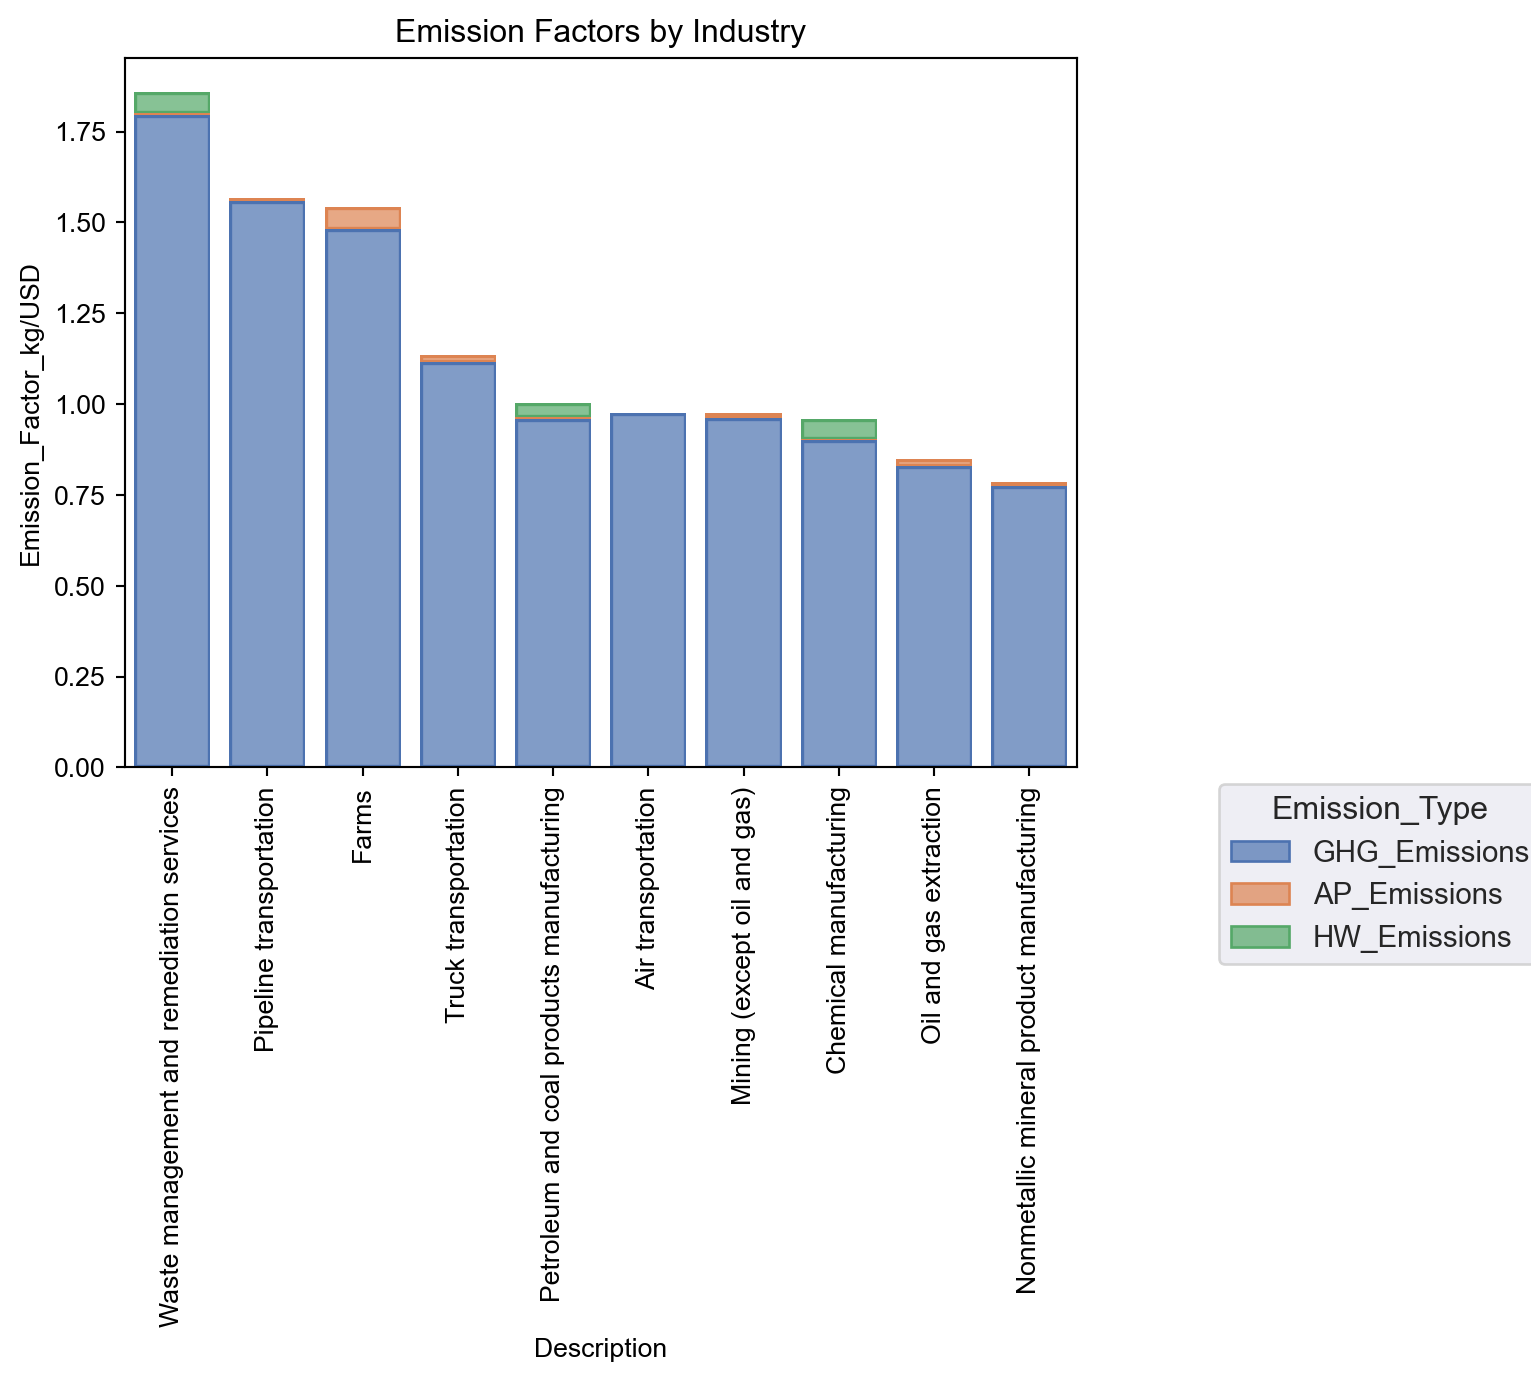

In [111]:
# Select data for plotting
factors_rank_data = factors_rank[:10]

# Rename labels for plotting
factors_rank_data = factors_rank_data.rename(columns = {'GHG_Emission_Factor' : 'GHG_Emissions', 'AP_Emission_Factor' : 'AP_Emissions', 'HW_Emission_Factor' : 'HW_Emissions'})

# Melt emission factors
factors_melt = factors_rank_data.melt(id_vars = ['Description'],
                                     value_vars = ['GHG_Emissions', 'AP_Emissions', 'HW_Emissions'],
                                     var_name = 'Emission_Type',
                                     value_name = 'Emission_Factor_kg/USD')

# Create axis id object (see for discussion: https://stackoverflow.com/questions/74715767/how-to-rotate-the-xticks-with-seaborn-objects)
fig, ax = plt.subplots();
ax.xaxis.set_tick_params(rotation = 90);
plt.close()

# Create and show plot
plot_ef = so.Plot(factors_melt, x = 'Description', y = 'Emission_Factor_kg/USD', color = 'Emission_Type').add(so.Bar(),so.Stack()).on(ax).label(title = 'Emission Factors by Industry');

# Show plot
plot_ef

In [112]:
# What was the total pollution, in kg, from these industries in 2021?
top_factors_total = df_gdp_factors[['Description', 'GDP_Code', 'Year', 'Total_Pollution']]
top_factors_total = top_factors_total.rename(columns = {'Total_Pollution' : 'Total_Pollution_kg'})
top_factors_total = top_factors_total.loc[top_factors_total.Year == '2021']
top_factors_total = top_factors_total.groupby('Description').sum(numeric_only = True)
top_factors_rank = factors_rank.merge(top_factors_total, how = 'left', on = 'Description')

# Result
top_factors_rank[:10]

,Description,GDP_Code,GHG_Emission_Factor,AP_Emission_Factor,HW_Emission_Factor,Pollution_Factor,Total_Pollution_kg
0,Waste management and remediation services,562,1.795909,0.005409,0.058769,1.860088,1.219191e+11
1,Pipeline transportation,486,1.558000,0.008696,0.000188,1.566884,7.071220e+10
2,Farms,111-112,1.482367,0.059643,0.000003,1.542013,2.539791e+11
3,Truck transportation,484,1.115000,0.021393,0.000019,1.136412,2.187797e+11
4,Petroleum and coal products manufacturing,324,0.957800,0.006691,0.039040,1.003532,1.297958e+11
5,Air transportation,481,0.976000,0.000009,0.000011,0.976021,8.200983e+10
6,Mining (except oil and gas),212,0.962190,0.012891,0.000061,0.975142,5.971837e+10
7,Chemical manufacturing,325,0.902069,0.001930,0.054117,0.958116,4.211811e+11
8,Oil and gas extraction,211,0.830000,0.019887,0.000024,0.849911,2.033124e+11
9,Nonmetallic mineral product manufacturing,327,0.775889,0.009021,0.000875,0.785785,5.518255e+10


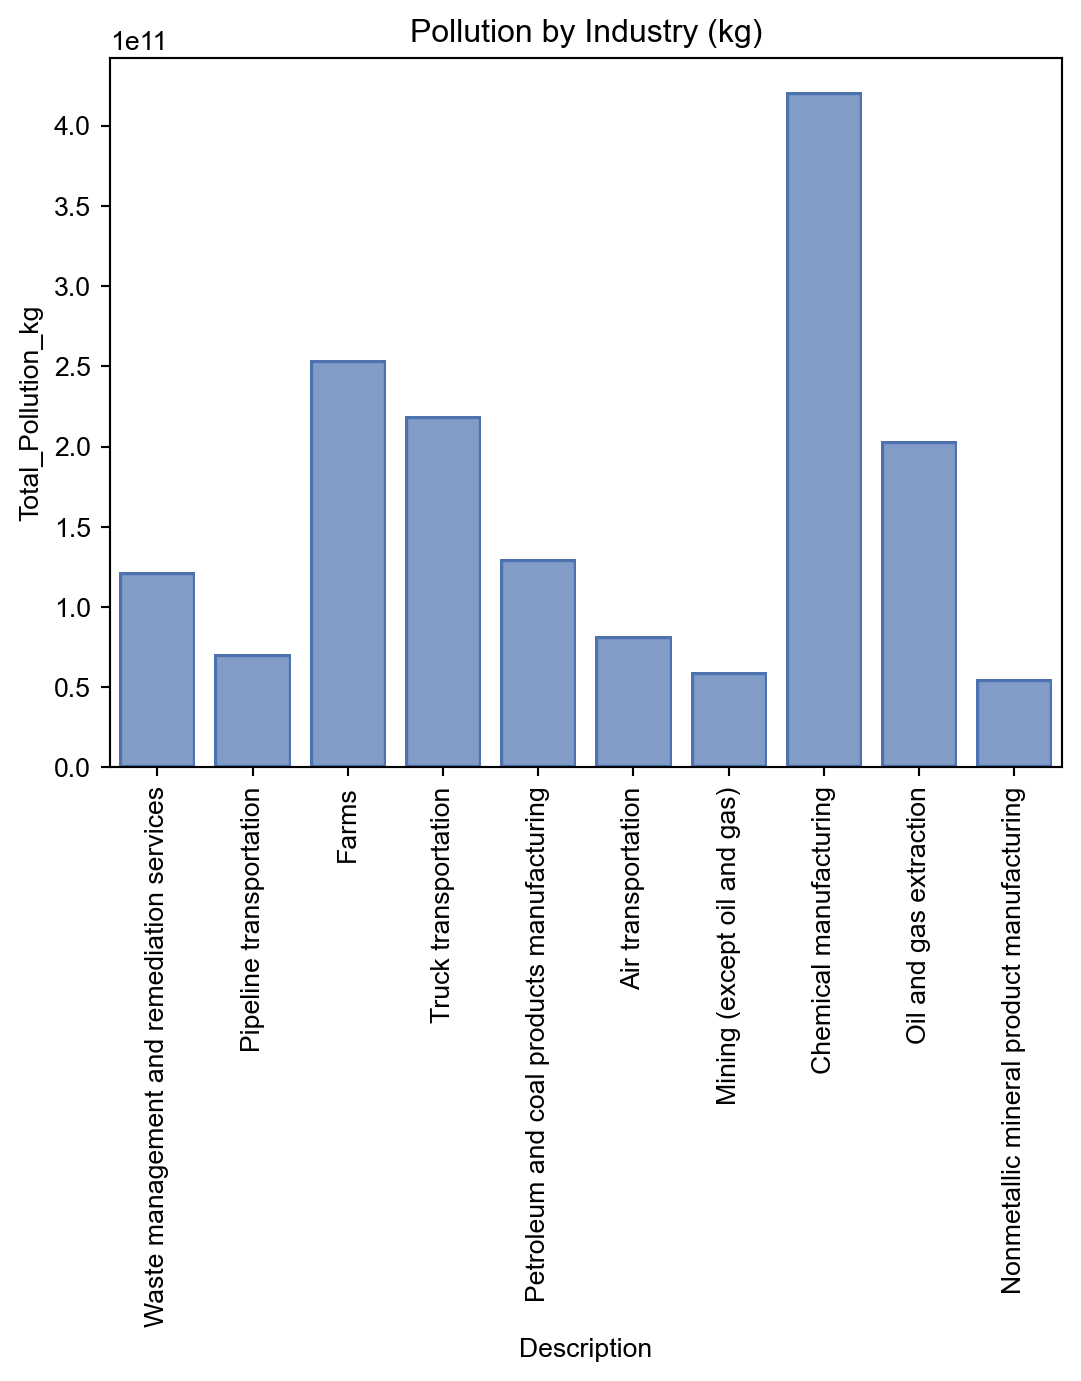

In [113]:
# Prepare plot of pollution amounts by industry
top_factors_rank_data = top_factors_rank[:10]

# Create axid object (see for discussion: https://stackoverflow.com/questions/74715767/how-to-rotate-the-xticks-with-seaborn-objects)
fig, ax = plt.subplots();
ax.xaxis.set_tick_params(rotation = 90);
plt.close()

# Create plot
plot_tp = so.Plot(top_factors_rank_data, x = 'Description', y = 'Total_Pollution_kg').add(so.Bar()).on(ax).label(title = 'Pollution by Industry (kg)');

# Show plot
plot_tp

In [114]:
# Which sectors produced the largest amount of pollution (kg) in 2021?
amount_2021 = df_gdp_factors[['Description', 'GDP_Code', 'Year', 'Total_Pollution']]
amount_2021 = amount_2021.rename(columns = {'Total_Pollution' : 'Total_Pollution_kg'})
amount_2021 = amount_2021.loc[amount_2021.Year == '2021']
amount_2021_sum = amount_2021.groupby('Description').sum(numeric_only = True)
amount_2021_rank = amount_2021_sum.sort_values(by = 'Total_Pollution_kg', ascending = False)
amount_2021_rank = amount_2021_rank.reset_index()

# Result
amount_2021_rank[:10]

,Description,Total_Pollution_kg
0,Real estate,8.390059e+11
1,Chemical manufacturing,4.211811e+11
2,Farms,2.539791e+11
3,Utilities,2.479684e+11
4,Construction,2.414277e+11
5,Retail trade,2.290408e+11
6,Wholesale trade,2.236402e+11
7,Food and beverage and tobacco product manufact...,2.200068e+11
8,Truck transportation,2.187797e+11
9,Oil and gas extraction,2.033124e+11


In [115]:
# Check size of Real estate vs other industries
gdp_2021 = df_gdp_factors[['Description', 'GDP_Code', 'Year', 'GDP_USD']]
gdp_2021 = gdp_2021.loc[gdp_2021.Year == '2021']
gdp_2021_sum = gdp_2021.groupby('Description').sum(numeric_only = True)
gdp_2021_rank = gdp_2021_sum.sort_values(by = 'GDP_USD', ascending = False)
gdp_2021_rank = gdp_2021_rank.reset_index()

# Result
gdp_2021_rank[:10]

# Real estate accounts for 11% of the GDP (Total US GDP was $23.3T in 2021)

,Description,GDP_USD
0,Real estate,2.670878e+12
1,Wholesale trade,1.444498e+12
2,Retail trade,1.391128e+12
3,"Miscellaneous professional, scientific, and te...",1.115725e+12
4,Construction,9.453018e+11
5,"Monetary Authorities- central bank, credit int...",8.904158e+11
6,Ambulatory health care services,8.495049e+11
7,Administrative and support services,6.801451e+11
8,Insurance carriers and related activities,6.373020e+11
9,Hospitals,5.607613e+11


In [116]:
# Check pollution factors for top two
factors_rank.loc[(factors_rank['Description'] == 'Real estate') | (factors_rank['Description'] == 'Wholesale trade')]

# Real estate factor is >2x that of Wholesale trade, the second largest sector by GDP

,Description,GDP_Code,GHG_Emission_Factor,AP_Emission_Factor,HW_Emission_Factor,Pollution_Factor
44,Real estate,531,0.314111,0.000016,0.000004,0.314131
26,Wholesale trade,42,0.154408,0.000320,0.000094,0.154822


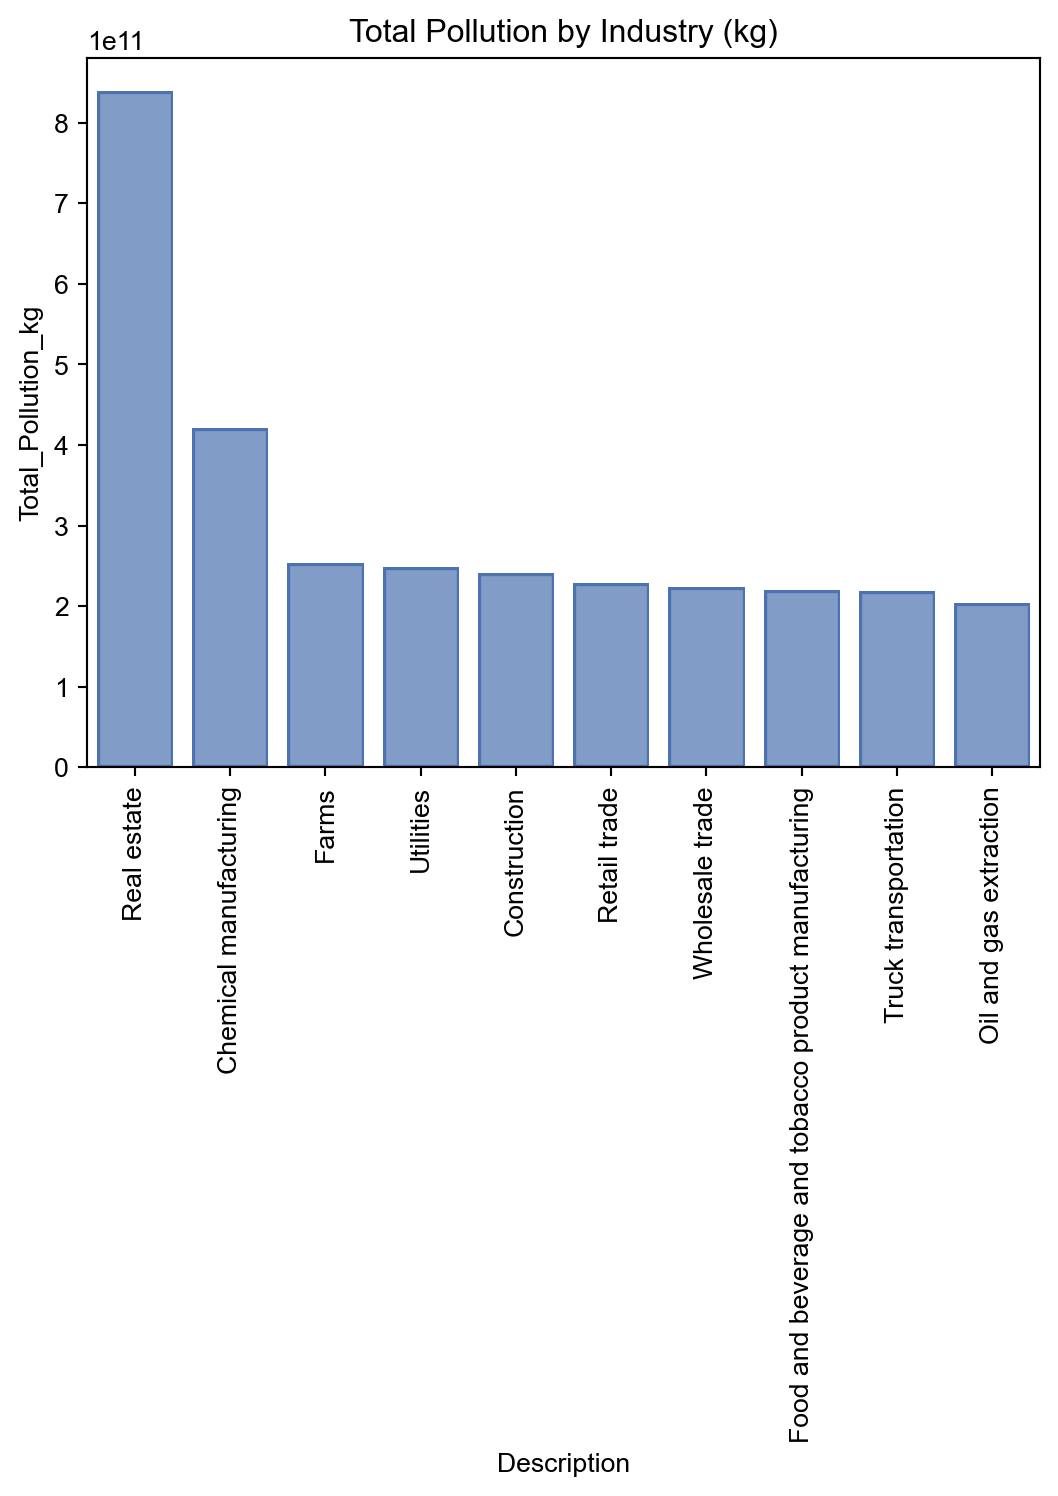

In [117]:
# Prepare plot of total pollution amounts by industry
amount_2021_rank_data = amount_2021_rank[:10]

# Create axid object (see for discussion: https://stackoverflow.com/questions/74715767/how-to-rotate-the-xticks-with-seaborn-objects)
fig, ax = plt.subplots();
ax.xaxis.set_tick_params(rotation = 90);
plt.close()

# Create plot
plot_tot = so.Plot(amount_2021_rank_data, x = 'Description', y = 'Total_Pollution_kg').add(so.Bar()).on(ax).label(title = 'Total Pollution by Industry (kg)');

# Show plot
plot_tot

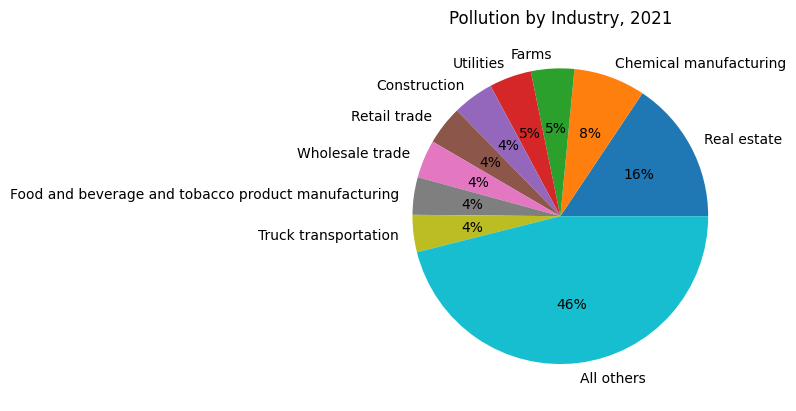

In [118]:
# Create Pie Chart of total pollution in 2021
labels = amount_2021_rank.Description[0:9].to_list() + ['All others']
amounts = amount_2021_rank.Total_Pollution_kg[0:9].to_list() + [amount_2021_rank.Total_Pollution_kg[9:].sum()]

fig, ax = plt.subplots()
ax.set_title('Pollution by Industry, 2021')
ax.pie(amounts, labels = labels, autopct='%1.f%%');

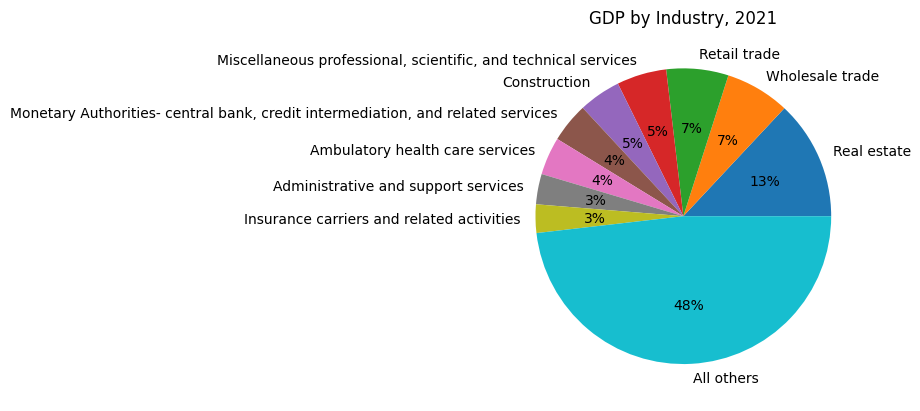

In [119]:
# Pie Chart of total GDP in 2021
labels = gdp_2021_rank.Description[0:9].to_list() + ['All others']
amounts = gdp_2021_rank.GDP_USD[0:9].to_list() + [gdp_2021_rank.GDP_USD[9:].sum()]

fig, ax = plt.subplots()
ax.set_title('GDP by Industry, 2021')
ax.pie(amounts, labels = labels, autopct='%1.f%%');

Observations:

The top 5 most polluting industries on a kg/USD basis were waste management, pipeline transportation, farms, truck transportation, and petroleum and coal mfg. The largest average pollution factors ranged between 1 and 1.86 kg of pollution per dollar of GDP. The majority of pollution originated from greenhouse gas emissions, with air pollution and hazardous waste generally making small contributions to an industries pollution factor.

Interestingly, only 3 of the 10 most polluting industries on a kg/USD basis (farms, chemical manufacturing, and truck transport) appeared in the overall top ten total pollution generators list, with real estate being the largest total pollution emitter. The real estate industry is the largest, by GDP within the economy.

## 3.2. Which states are experiencing the largest growth in these polluting industries (as indicated by GDP)?
The general approach is to select the top 5 polluting industries and calculate the %change in contribution to GDP from 2017 to 2021 for each industry at the state-level. States with the top 5 growth rates will be determined by sorting at slicing the resulting list.

In [120]:
# Collect top 5 industries
factors = factors_rank.Description[0:5].to_list()
factors

['Waste management and remediation services',
 'Pipeline transportation',
 'Farms',
 'Truck transportation',
 'Petroleum and coal products manufacturing']

In [121]:
# Select industries with 5 largest pollution factors
growth_by_state = df_gdp_factors[['Description', 'State_Name', 'Year', 'GDP_USD']]
growth_by_state = growth_by_state.query('Description == @factors')

# Pivot by Year
growth_by_state = growth_by_state.pivot(index = ['Description', 'State_Name'], columns = 'Year', values = 'GDP_USD')

# Calculate %change in GDP 2021 vs 2017, add to DataFrame
growth_by_state['%_Change'] = ((growth_by_state['2021'] - growth_by_state['2017']) / growth_by_state['2017']) * 100

# Sample DataFrame
growth_by_state

Year                                                             2017  \
Description                               State_Name                    
Farms                                     Alabama        1.788000e+09   
                                          Alaska         2.500000e+07   
                                          Arizona        1.917600e+09   
                                          Arkansas       2.347500e+09   
                                          California     2.699870e+10   
...                                                               ...   
Waste management and remediation services Virginia       1.015600e+09   
                                          Washington     2.862200e+09   
                                          West Virginia  2.318000e+08   
                                          Wisconsin      7.186000e+08   
                                          Wyoming        8.390000e+07   

Year                                                             2018  \
Description                               State_Name                    
Farms                                     Alabama        1.775600e+09   
                                          Alaska         2.420000e+07   
                                          Arizona        1.900100e+09   
                                          Arkansas       2.173400e+09   
                                          California     2.603810e+10   
...                                                               ...   
Waste management and remediation services Virginia       1.091300e+09   
                                          Washington     2.885300e+09   
                                          West Virginia  2.841000e+08   
                                          Wisconsin      7.772000e+08   
                                          Wyoming        8.150000e+07   

Year                                                             2019  \
Description                               State_Name                    
Farms                                     Alabama        1.312600e+09   
                                          Alaska         2.220000e+07   
                                          Arizona        1.811800e+09   
                                          Arkansas       1.240600e+09   
                                          California     2.271140e+10   
...                                                               ...   
Waste management and remediation services Virginia       1.119400e+09   
                                          Washington     3.037100e+09   
                                          West Virginia  3.117000e+08   
                                          Wisconsin      7.975000e+08   
                                          Wyoming        8.120000e+07   

Year                                                             2020  \
Description                               State_Name                    
Farms                                     Alabama        8.970000e+08   
                                          Alaska         2.150000e+07   
                                          Arizona        1.856000e+09   
                                          Arkansas       1.307700e+09   
                                          California     2.319440e+10   
...                                                               ...   
Waste management and remediation services Virginia       1.148100e+09   
                                          Washington     3.252700e+09   
                                          West Virginia  2.793000e+08   
                                          Wisconsin      8.675000e+08   
                                          Wyoming        8.010000e+07   

Year                                                             2021  \
Description                               State_Name                    
Farms                                     Alabama     

In [122]:
# NaNs and Infs appear in results
print(growth_by_state.at[('Farms', 'District of Columbia'), '%_Change'], 
      growth_by_state.at[('Pipeline transportation', 'Hawaii'), '%_Change'])

# Flag inf as NaN
pd.options.mode.use_inf_as_na = True

# Confirm
growth_by_state.loc[growth_by_state['%_Change'].isna()]

nan inf


,Year,2017,2018,2019,2020,2021,%_Change
Description,State_Name,,,,,,
Farms,District of Columbia,0.0,0.0,0.0,0.0,0.0,NaN
Petroleum and coal products manufacturing,District of Columbia,0.0,100000.0,200000.0,100000.0,200000.0,NaN
Pipeline transportation,Hawaii,0.0,200000.0,100000.0,100000.0,100000.0,NaN


In [123]:
# Impute averages for D.C. and HI 2017 values
growth_by_state.at[('Petroleum and coal products manufacturing', 
                    'District of Columbia'), 
                    '2017'] = growth_by_state.loc[('Petroleum and coal products manufacturing', 
                                                   'District of Columbia'), 
                                                   '2018' : '2021'].mean()
growth_by_state.at[('Pipeline transportation', 
                    'Hawaii'), 
                    '2017'] = growth_by_state.loc[('Pipeline transportation', 
                                                   'Hawaii'), 
                                                   '2018' : '2021'].mean()

# Confirm change
print(growth_by_state.at[('Petroleum and coal products manufacturing', 'District of Columbia'), '2017'], 
growth_by_state.at[('Pipeline transportation', 'Hawaii'), '2017'])

150000.0 125000.0


In [124]:
# Determine top 5 states with largest growth in each category
# Waste management and remediation services
df0 = growth_by_state.query("Description == 'Waste management and remediation services'")
df0 = df0.sort_values(by = '%_Change', ascending = False)

df1 = growth_by_state.query("Description == 'Pipeline transportation'")
df1 = df1.sort_values(by = '%_Change', ascending = False)

df2 = growth_by_state.query("Description == 'Farms'")
df2 = df2.sort_values(by = '%_Change', ascending = False)

df3 = growth_by_state.query("Description == 'Truck transportation'")
df3 = df3.sort_values(by = '%_Change', ascending = False)

df4 = growth_by_state.query("Description == 'Petroleum and coal products manufacturing'")
df4 = df4.sort_values(by = '%_Change', ascending = False)

In [125]:
# Show list for Waste management and remediation services
df0[:5]

Year                                                                   2017  \
Description                               State_Name                          
Waste management and remediation services New Mexico            368700000.0   
                                          District of Columbia   46100000.0   
                                          Arkansas              351900000.0   
                                          Georgia               961700000.0   
                                          Vermont               118200000.0   

Year                                                                    2018  \
Description                               State_Name                           
Waste management and remediation services New Mexico            4.274000e+08   
                                          District of Columbia  4.510000e+07   
                                          Arkansas              4.063000e+08   
                                          Georgia               1.052200e+09   
                                          Vermont               1.259000e+08   

Year                                                                    2019  \
Description                               State_Name                           
Waste management and remediation services New Mexico            5.041000e+08   
                                          District of Columbia  4.990000e+07   
                                          Arkansas              4.409000e+08   
                                          Georgia               1.138600e+09   
                                          Vermont               1.455000e+08   

Year                                                                    2020  \
Description                               State_Name                           
Waste management and remediation services New Mexico            5.483000e+08   
                                          District of Columbia  5.810000e+07   
                                          Arkansas              4.743000e+08   
                                          Georgia               1.208800e+09   
                                          Vermont               1.612000e+08   

Year                                                                    2021  \
Description                               State_Name                           
Waste management and remediation services New Mexico            5.576000e+08   
                                          District of Columbia  6.800000e+07   
                                          Arkansas              5.173000e+08   
                                          Georgia               1.382000e+09   
                                          Vermont               1.686000e+08   

Year                                                             %_Change  
Description                               State_Name                       
Waste management and remediation services New Mexico            51.234066  
                                          District of Columbia  47.505423  
                                          Arkansas              47.001989  
                                          Georgia               43.703858  
                                          Vermont               42.639594

In [126]:
# Show list for Pipeline transportation
df1[:5]

Year                                           2017         2018         2019  \
Description             State_Name                                              
Pipeline transportation New Hampshire     1600000.0   14400000.0   20100000.0   
                        New Mexico       50900000.0  145300000.0  147500000.0   
                        Illinois        356000000.0  614600000.0  905400000.0   
                        Oregon           24800000.0   26000000.0   27700000.0   
                        South Carolina   19700000.0   21500000.0   23700000.0   

Year                                           2020         2021     %_Change  
Description             State_Name                                             
Pipeline transportation New Hampshire    18700000.0   19400000.0  1112.500000  
                        New Mexico      162300000.0  178500000.0   250.687623  
                        Illinois        863000000.0  882100000.0   147.780899  
                        Oregon           38700000.0   50200000.0   102.419355  
                        South Carolina   21600000.0   35800000.0    81.725888

In [127]:
# Show list for Farms
df2[:5]

Year                              2017          2018          2019  \
Description State_Name                                               
Farms       Illinois      5.387900e+09  5.935800e+09  4.090400e+09   
            Nebraska      5.170500e+09  5.316800e+09  5.572900e+09   
            Indiana       3.395500e+09  3.500300e+09  2.465200e+09   
            South Dakota  3.062800e+09  3.437500e+09  2.902000e+09   
            Ohio          2.971500e+09  3.446200e+09  2.198800e+09   

Year                              2020          2021   %_Change  
Description State_Name                                           
Farms       Illinois      5.330400e+09  9.729700e+09  80.584272  
            Nebraska      6.161200e+09  9.213800e+09  78.199400  
            Indiana       3.691900e+09  5.792300e+09  70.587542  
            South Dakota  3.430100e+09  4.889200e+09  59.631710  
            Ohio          3.175100e+09  4.666100e+09  57.028437

In [128]:
# Show list for Truck transportation
df3[:5]

Year                                         2017          2018          2019  \
Description          State_Name                                                 
Truck transportation Florida         5.524600e+09  6.566800e+09  7.063500e+09   
                     Arizona         2.332400e+09  2.523300e+09  2.626300e+09   
                     California      1.704520e+10  1.828070e+10  1.934480e+10   
                     Nevada          9.362000e+08  9.955000e+08  1.085400e+09   
                     North Carolina  4.263400e+09  4.644800e+09  4.878500e+09   

Year                                         2020          2021   %_Change  
Description          State_Name                                             
Truck transportation Florida         7.172000e+09  8.544000e+09  54.653731  
                     Arizona         2.786700e+09  3.104300e+09  33.094666  
                     California      1.927100e+10  2.244460e+10  31.676953  
                     Nevada          1.064400e+09  1.231100e+09  31.499680  
                     North Carolina  4.917900e+09  5.593600e+09  31.200450

In [129]:
# Show list for Petroleum and coal products manufacturing
df4[:5]

Year                                                           2017  \
Description                               State_Name                  
Petroleum and coal products manufacturing Virginia      160800000.0   
                                          Arizona       105100000.0   
                                          North Dakota  202200000.0   
                                          Rhode Island   48000000.0   
                                          Nevada        117100000.0   

Year                                                           2018  \
Description                               State_Name                  
Petroleum and coal products manufacturing Virginia      153800000.0   
                                          Arizona        88800000.0   
                                          North Dakota  238000000.0   
                                          Rhode Island   61900000.0   
                                          Nevada        125100000.0   

Year                                                           2019  \
Description                               State_Name                  
Petroleum and coal products manufacturing Virginia      354800000.0   
                                          Arizona        82900000.0   
                                          North Dakota  236800000.0   
                                          Rhode Island   60200000.0   
                                          Nevada        102200000.0   

Year                                                           2020  \
Description                               State_Name                  
Petroleum and coal products manufacturing Virginia      240600000.0   
                                          Arizona        75500000.0   
                                          North Dakota  181700000.0   
                                          Rhode Island   43500000.0   
                                          Nevada         81100000.0   

Year                                                           2021  \
Description                               State_Name                  
Petroleum and coal products manufacturing Virginia      559700000.0   
                                          Arizona       268100000.0   
                                          North Dakota  424000000.0   
                                          Rhode Island   97400000.0   
                                          Nevada        226100000.0   

Year                                                      %_Change  
Description                               State_Name                
Petroleum and coal products manufacturing Virginia      248.072139  
                                          Arizona       155.090390  
                                          North Dakota  109.693373  
                                          Rhode Island  102.916667  
                                          Nevada         93.082835

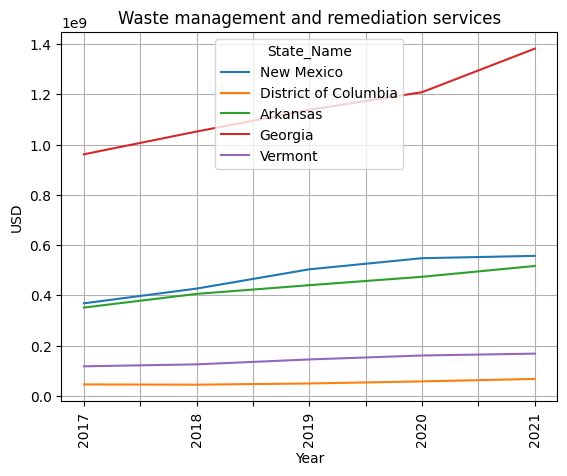

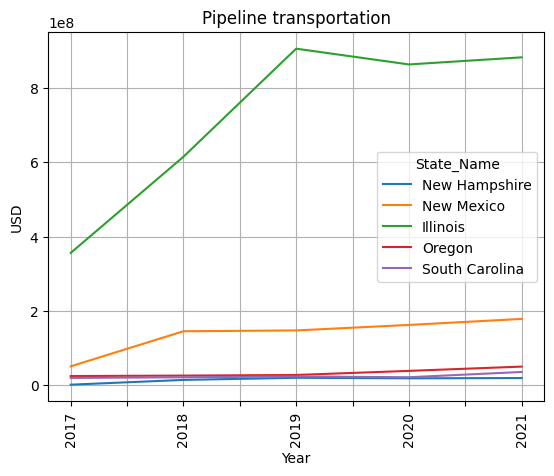

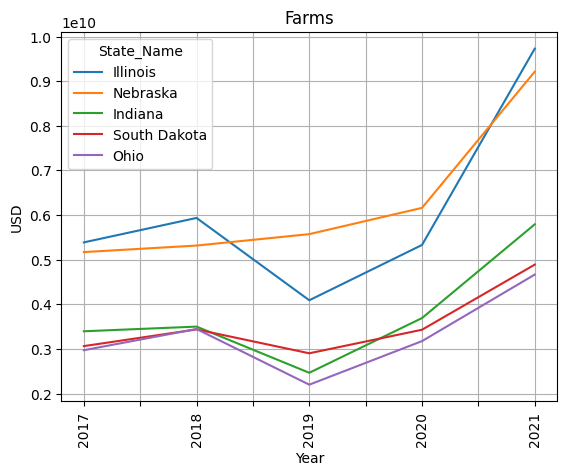

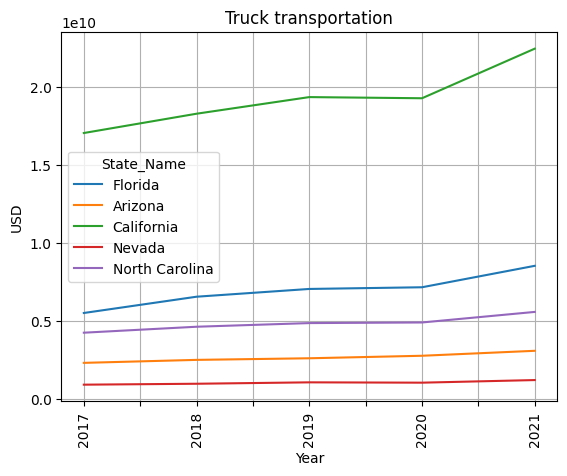

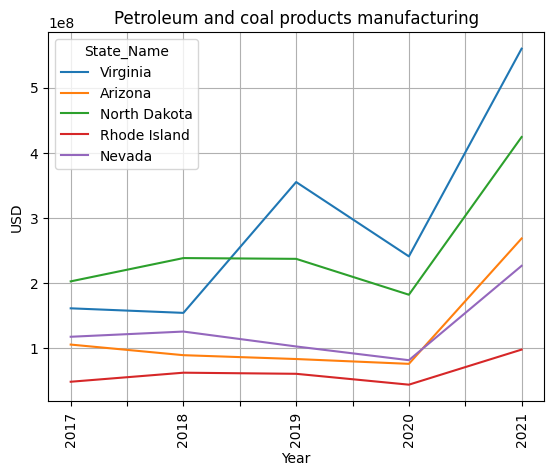

In [130]:
# Prepare line chart of results for each sector
# WM
dfwm = df0[:5]
dfwm.reset_index(inplace = True)
dfwm.set_index('State_Name', drop = True, inplace = True)
dfwm = dfwm.drop(columns = ['Description', '%_Change']).T

# Plot WM
wm_plot = dfwm.plot.line(legend = True, rot = 90, ylabel = 'USD', grid = True, title = df0.index[0][0])

# PT
dfpt = df1[:5]
dfpt.reset_index(inplace = True)
dfpt.set_index('State_Name', drop = True, inplace = True)
dfpt = dfpt.drop(columns = ['Description', '%_Change']).T

# Plot PT
pt_plot = dfpt.plot.line(legend = True, rot = 90, ylabel = 'USD', grid = True, title = df1.index[0][0])

# F
dff = df2[:5]
dff.reset_index(inplace = True)
dff.set_index('State_Name', drop = True, inplace = True)
dff = dff.drop(columns = ['Description', '%_Change']).T

# Plot F
f_plot = dff.plot.line(legend = True, rot = 90, ylabel = 'USD', grid = True, title = df2.index[0][0])

# TT
dftt = df3[:5]
dftt.reset_index(inplace = True)
dftt.set_index('State_Name', drop = True, inplace = True)
dftt = dftt.drop(columns = ['Description', '%_Change']).T

# Plot TT
tt_plot = dftt.plot.line(legend = True, rot = 90, ylabel = 'USD', grid = True, title = df3.index[0][0])

# PCM
dfpcm = df4[:5]
dfpcm.reset_index(inplace = True)
dfpcm.set_index('State_Name', drop = True, inplace = True)
dfpcm = dfpcm.drop(columns = ['Description', '%_Change']).T

# Plot PCM
pcm_plot = dfpcm.plot.line(legend = True, rot = 90, ylabel = 'USD', grid = True, title = df4.index[0][0])

Observations:

The top growing state in each polluting industry was:

*   Waste Management: New Mexico >50%
*   Pipeline Transp: New Hampshire >1000%
*   Farms: Illinois >80%
*   Truck Transp: Florida > 55%
*   Petroleum and Coal Mfg: Virginia >250%

Plotting the line charts for the top five states in each industry also revealed that some states with large growth were not necessarily the states with the largest contribution to overall GDP for that sector. For example, Florida was the growth leader for truck transportation, but California truck transportation contributed > 2x more in GDP.

In general, states indicated an uptick in contribution to GDP from 2020 to 2021 and is consistent with a late-pandemic boom.

Underlying reasons for these changes could be part of further study.

## 3.3. Which of the most polluting industries are experiencing growing wages? Which are experiencing shrinking wages?
The general approach is to select the top 10 polluting industries and merge with the wages DataFrame then calculate the %change in average annual pay from 2017 to 2021. The resulting list will be sorted and sliced to determine wich industries have had the largest wage growth.

In [131]:
# Get top ten sectors
factors = factors_rank.Description[0:10].to_list()

# Load GDP codes in fresh
cmb_ghg_ap_hw_factors = pd.read_csv('cmb_ghg_ap_hw_factors.csv', dtype = {'GDP_Code' : 'str'})

# Create DataFrame of top ten polluting industries, with GDP code
tt = cmb_ghg_ap_hw_factors.drop(columns = ['GHG_Emission_Factor', 'AP_Emission_Factor', 'HW_Emission_Factor', 'Pollution_Factor'])
tt = tt.query("Description == @factors").reset_index(drop = True)

# Merge top ten polluting industries with wage DataFrame
result = tt.merge(df_wages, how = 'left', on = 'Description')

# Drop unncessary columns
result = result.drop(columns = ['GDP_Code_x', 'GDP_Code_y'])

# Sample DataFrame
result

,Description,YEAR,STATENAME,ESTAB,EMP,PAYANN,Annual_Wages_per_Employee_USD
0,Farms,NaN,NaN,NaN,NaN,NaN,NaN
1,Oil and gas extraction,2017,Mississippi,62.0,627.0,72321.0,115344.497608
2,Oil and gas extraction,2017,Missouri,10.0,11.0,1421.0,129181.818182
3,Oil and gas extraction,2017,Montana,79.0,875.0,88696.0,101366.857143
4,Oil and gas extraction,2017,Nebraska,16.0,93.0,4725.0,50806.451613
...,...,...,...,...,...,...,...
2176,Waste management and remediation services,2021,Pennsylvania,1250.0,21054.0,1289132.0,61229.790064
2177,Waste management and remediation services,2021,Virginia,605.0,9073.0,537323.0,59222.197730
2178,Waste management and remediation services,2021,Washington,658.0,15518.0,1271047.0,81907.913391
2179,Waste management and remediation services,2021,Wisconsin,601.0,6914.0,429232.0,62081.573619


In [132]:
# Drop NaNs
result = result.dropna(axis = 0)
result = result.reset_index(drop = True)
result

,Description,YEAR,STATENAME,ESTAB,EMP,PAYANN,Annual_Wages_per_Employee_USD
0,Oil and gas extraction,2017,Mississippi,62.0,627.0,72321.0,115344.497608
1,Oil and gas extraction,2017,Missouri,10.0,11.0,1421.0,129181.818182
2,Oil and gas extraction,2017,Montana,79.0,875.0,88696.0,101366.857143
3,Oil and gas extraction,2017,Nebraska,16.0,93.0,4725.0,50806.451613
4,Oil and gas extraction,2017,Nevada,12.0,56.0,3288.0,58714.285714
...,...,...,...,...,...,...,...
2175,Waste management and remediation services,2021,Pennsylvania,1250.0,21054.0,1289132.0,61229.790064
2176,Waste management and remediation services,2021,Virginia,605.0,9073.0,537323.0,59222.197730
2177,Waste management and remediation services,2021,Washington,658.0,15518.0,1271047.0,81907.913391
2178,Waste management and remediation services,2021,Wisconsin,601.0,6914.0,429232.0,62081.573619


In [133]:
# Pivot on YEAR
pivot = result.pivot(columns = 'YEAR', index = ['Description', 'STATENAME'], values = 'Annual_Wages_per_Employee_USD')

# Show DataFrame
pivot

YEAR                                                             2017  \
Description                               STATENAME                     
Air transportation                        Alabama        77057.569296   
                                          Alaska         66327.564103   
                                          Arizona        75393.367437   
                                          Arkansas       41499.029126   
                                          California     91488.673958   
...                                                               ...   
Waste management and remediation services Virginia       53106.143971   
                                          Washington     75147.539743   
                                          West Virginia  52086.414791   
                                          Wisconsin      54423.676471   
                                          Wyoming        52978.971963   

YEAR                                                             2018  \
Description                               STATENAME                     
Air transportation                        Alabama        72595.978062   
                                          Alaska         64761.250731   
                                          Arizona        82153.870398   
                                          Arkansas       40512.635379   
                                          California     91695.450405   
...                                                               ...   
Waste management and remediation services Virginia       53493.251673   
                                          Washington     78231.902081   
                                          West Virginia  50314.693405   
                                          Wisconsin      53399.811346   
                                          Wyoming        61735.357918   

YEAR                                                             2019  \
Description                               STATENAME                     
Air transportation                        Alabama        73113.673806   
                                          Alaska         81611.977030   
                                          Arizona        82954.848967   
                                          Arkansas       43098.939929   
                                          California     94949.914266   
...                                                               ...   
Waste management and remediation services Virginia       55041.344843   
                                          Washington     79095.061412   
                                          West Virginia  51838.261489   
                                          Wisconsin      57598.996474   
                                          Wyoming        65705.167173   

YEAR                                                             2020  \
Description                               STATENAME                     
Air transportation                        Alabama        75336.734694   
                                          Alaska         81246.643110   
                                          Arizona        75784.193754   
                                          Arkansas       46634.751773   
                                          California     83029.667246   
...                                                               ...   
Waste management and remediation services Virginia       55089.588919   
                                          Washington     81657.249789   
                                          West Virginia  50031.723143   
                                          Wisconsin      59930.472727   
                                          Wyoming        51516.925892   

YEAR                                                              2021  
Description                               STATENAME                     
Air transportation                        Alabama     

In [134]:
# Pivoting introduces NaNs from '0.0' wages reported for sectors in some states in 2017
# These will be dropped later
check = pivot.loc[(pivot['2017']).isna()]
check

YEAR                                                            2017  \
Description                               STATENAME                    
Chemical manufacturing                    District of Columbia   NaN   
Oil and gas extraction                    Idaho                  NaN   
                                          Minnesota              NaN   
                                          New Jersey             NaN   
                                          North Carolina         NaN   
                                          Wisconsin              NaN   
Petroleum and coal products manufacturing Hawaii                 NaN   
                                          Idaho                  NaN   
                                          Nebraska               NaN   
                                          South Dakota           NaN   
                                          Vermont                NaN   
Pipeline transportation                   Alaska                 NaN   
                                          Idaho                  NaN   
                                          Nevada                 NaN   
                                          Rhode Island           NaN   

YEAR                                                                     2018  \
Description                               STATENAME                             
Chemical manufacturing                    District of Columbia   49000.000000   
Oil and gas extraction                    Idaho                  61000.000000   
                                          Minnesota              49076.923077   
                                          New Jersey                      NaN   
                                          North Carolina        416952.380952   
                                          Wisconsin              79714.285714   
Petroleum and coal products manufacturing Hawaii                129568.000000   
                                          Idaho                           NaN   
                                          Nebraska               51809.523810   
                                          South Dakota           91800.000000   
                                          Vermont                55870.967742   
Pipeline transportation                   Alaska                160860.945139   
                                          Idaho                  95711.538462   
                                          Nevada                100106.382979   
                                          Rhode Island                    NaN   

YEAR                                                                     2019  \
Description                               STATENAME                             
Chemical manufacturing                    District of Columbia            NaN   
Oil and gas extraction                    Idaho                  76333.333333   
                                          Minnesota                       NaN   
                                          New Jersey                      NaN   
                                          North Carolina        289309.523810   
                                          Wisconsin                       NaN   
Petroleum and coal products manufacturing Hawaii                 93311.320755   
                                          Idaho                           NaN   
                                          Nebraska               48947.368421   
                                          South Dakota           84710.526316   
                                          Vermont                60571.428571   
Pipeline transportation                   Alaska                166458.630137   
                                          Idaho                 104283.018868   
                                          Nevada                104638.297872   
                                          Rhode Island                    NaN   

YEAR               

In [135]:
# Calculate %Change in Annual Pay for 2017 - 2021
pivot['%Change_2017'] = ((pivot['2017'] - pivot['2017']) / pivot['2017']) * 100
pivot['%Change_2018'] = ((pivot['2018'] - pivot['2017']) / pivot['2017']) * 100
pivot['%Change_2019'] = ((pivot['2019'] - pivot['2017']) / pivot['2017']) * 100
pivot['%Change_2020'] = ((pivot['2020'] - pivot['2017']) / pivot['2017']) * 100
pivot['%Change_2021'] = ((pivot['2021'] - pivot['2017']) / pivot['2017']) * 100

# Sample DataFrame
pivot

YEAR                                                             2017  \
Description                               STATENAME                     
Air transportation                        Alabama        77057.569296   
                                          Alaska         66327.564103   
                                          Arizona        75393.367437   
                                          Arkansas       41499.029126   
                                          California     91488.673958   
...                                                               ...   
Waste management and remediation services Virginia       53106.143971   
                                          Washington     75147.539743   
                                          West Virginia  52086.414791   
                                          Wisconsin      54423.676471   
                                          Wyoming        52978.971963   

YEAR                                                             2018  \
Description                               STATENAME                     
Air transportation                        Alabama        72595.978062   
                                          Alaska         64761.250731   
                                          Arizona        82153.870398   
                                          Arkansas       40512.635379   
                                          California     91695.450405   
...                                                               ...   
Waste management and remediation services Virginia       53493.251673   
                                          Washington     78231.902081   
                                          West Virginia  50314.693405   
                                          Wisconsin      53399.811346   
                                          Wyoming        61735.357918   

YEAR                                                             2019  \
Description                               STATENAME                     
Air transportation                        Alabama        73113.673806   
                                          Alaska         81611.977030   
                                          Arizona        82954.848967   
                                          Arkansas       43098.939929   
                                          California     94949.914266   
...                                                               ...   
Waste management and remediation services Virginia       55041.344843   
                                          Washington     79095.061412   
                                          West Virginia  51838.261489   
                                          Wisconsin      57598.996474   
                                          Wyoming        65705.167173   

YEAR                                                             2020  \
Description                               STATENAME                     
Air transportation                        Alabama        75336.734694   
                                          Alaska         81246.643110   
                                          Arizona        75784.193754   
                                          Arkansas       46634.751773   
                                          California     83029.667246   
...                                                               ...   
Waste management and remediation services Virginia       55089.588919   
                                          Washington     81657.249789   
                                          West Virginia  50031.723143   
                                          Wisconsin      59930.472727   
                                          Wyoming        51516.925892   

YEAR                                                              2021  \
Description                               STATENAME                      
Air transportation                        Alabama   

In [136]:
# Check for nulls
nulls = pivot.loc[pivot['2017'].isna()]
nulls

YEAR                                                            2017  \
Description                               STATENAME                    
Chemical manufacturing                    District of Columbia   NaN   
Oil and gas extraction                    Idaho                  NaN   
                                          Minnesota              NaN   
                                          New Jersey             NaN   
                                          North Carolina         NaN   
                                          Wisconsin              NaN   
Petroleum and coal products manufacturing Hawaii                 NaN   
                                          Idaho                  NaN   
                                          Nebraska               NaN   
                                          South Dakota           NaN   
                                          Vermont                NaN   
Pipeline transportation                   Alaska                 NaN   
                                          Idaho                  NaN   
                                          Nevada                 NaN   
                                          Rhode Island           NaN   

YEAR                                                                     2018  \
Description                               STATENAME                             
Chemical manufacturing                    District of Columbia   49000.000000   
Oil and gas extraction                    Idaho                  61000.000000   
                                          Minnesota              49076.923077   
                                          New Jersey                      NaN   
                                          North Carolina        416952.380952   
                                          Wisconsin              79714.285714   
Petroleum and coal products manufacturing Hawaii                129568.000000   
                                          Idaho                           NaN   
                                          Nebraska               51809.523810   
                                          South Dakota           91800.000000   
                                          Vermont                55870.967742   
Pipeline transportation                   Alaska                160860.945139   
                                          Idaho                  95711.538462   
                                          Nevada                100106.382979   
                                          Rhode Island                    NaN   

YEAR                                                                     2019  \
Description                               STATENAME                             
Chemical manufacturing                    District of Columbia            NaN   
Oil and gas extraction                    Idaho                  76333.333333   
                                          Minnesota                       NaN   
                                          New Jersey                      NaN   
                                          North Carolina        289309.523810   
                                          Wisconsin                       NaN   
Petroleum and coal products manufacturing Hawaii                 93311.320755   
                                          Idaho                           NaN   
                                          Nebraska               48947.368421   
                                          South Dakota           84710.526316   
                                          Vermont                60571.428571   
Pipeline transportation                   Alaska                166458.630137   
                                          Idaho                 104283.018868   
                                          Nevada                104638.297872   
                                          Rhode Island                    NaN   

YEAR               

In [137]:
# Create working copy, drop NaNs and reset index
p_test = pivot.copy()
p_test.dropna(inplace = True)
p_test.reset_index(inplace = True)

# Clean multiIndex by dropping and renaming columns
p_test = p_test.drop(columns = ['2017', '2018', '2019', '2020', '2021'])
p_test = p_test.rename(columns = {'%Change_2017' : '2017', '%Change_2018' : '2018', '%Change_2019' : '2019', '%Change_2020' : '2020', '%Change_2021' : '2021'})

# Melt table to allow faceted plotting
p_test = p_test.melt(id_vars = ['STATENAME', 'Description'], value_vars = ['2017', '2018', '2019', '2020', '2021'], var_name = 'YEAR', value_name='%Change_Annual_Pay', ignore_index = True)

# Sample DataFrame
p_test

,STATENAME,Description,YEAR,%Change_Annual_Pay
0,Alabama,Air transportation,2017,0.000000
1,Alaska,Air transportation,2017,0.000000
2,Arizona,Air transportation,2017,0.000000
3,Arkansas,Air transportation,2017,0.000000
4,California,Air transportation,2017,0.000000
...,...,...,...,...
2120,Virginia,Waste management and remediation services,2021,11.516659
2121,Washington,Waste management and remediation services,2021,8.996134
2122,West Virginia,Waste management and remediation services,2021,2.157026
2123,Wisconsin,Waste management and remediation services,2021,14.070893


In [138]:
# DataFrame info
p_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2125 entries, 0 to 2124
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   STATENAME           2125 non-null   object 
 1   Description         2125 non-null   object 
 2   YEAR                2125 non-null   object 
 3   %Change_Annual_Pay  2125 non-null   float64
dtypes: float64(1), object(3)
memory usage: 66.5+ KB


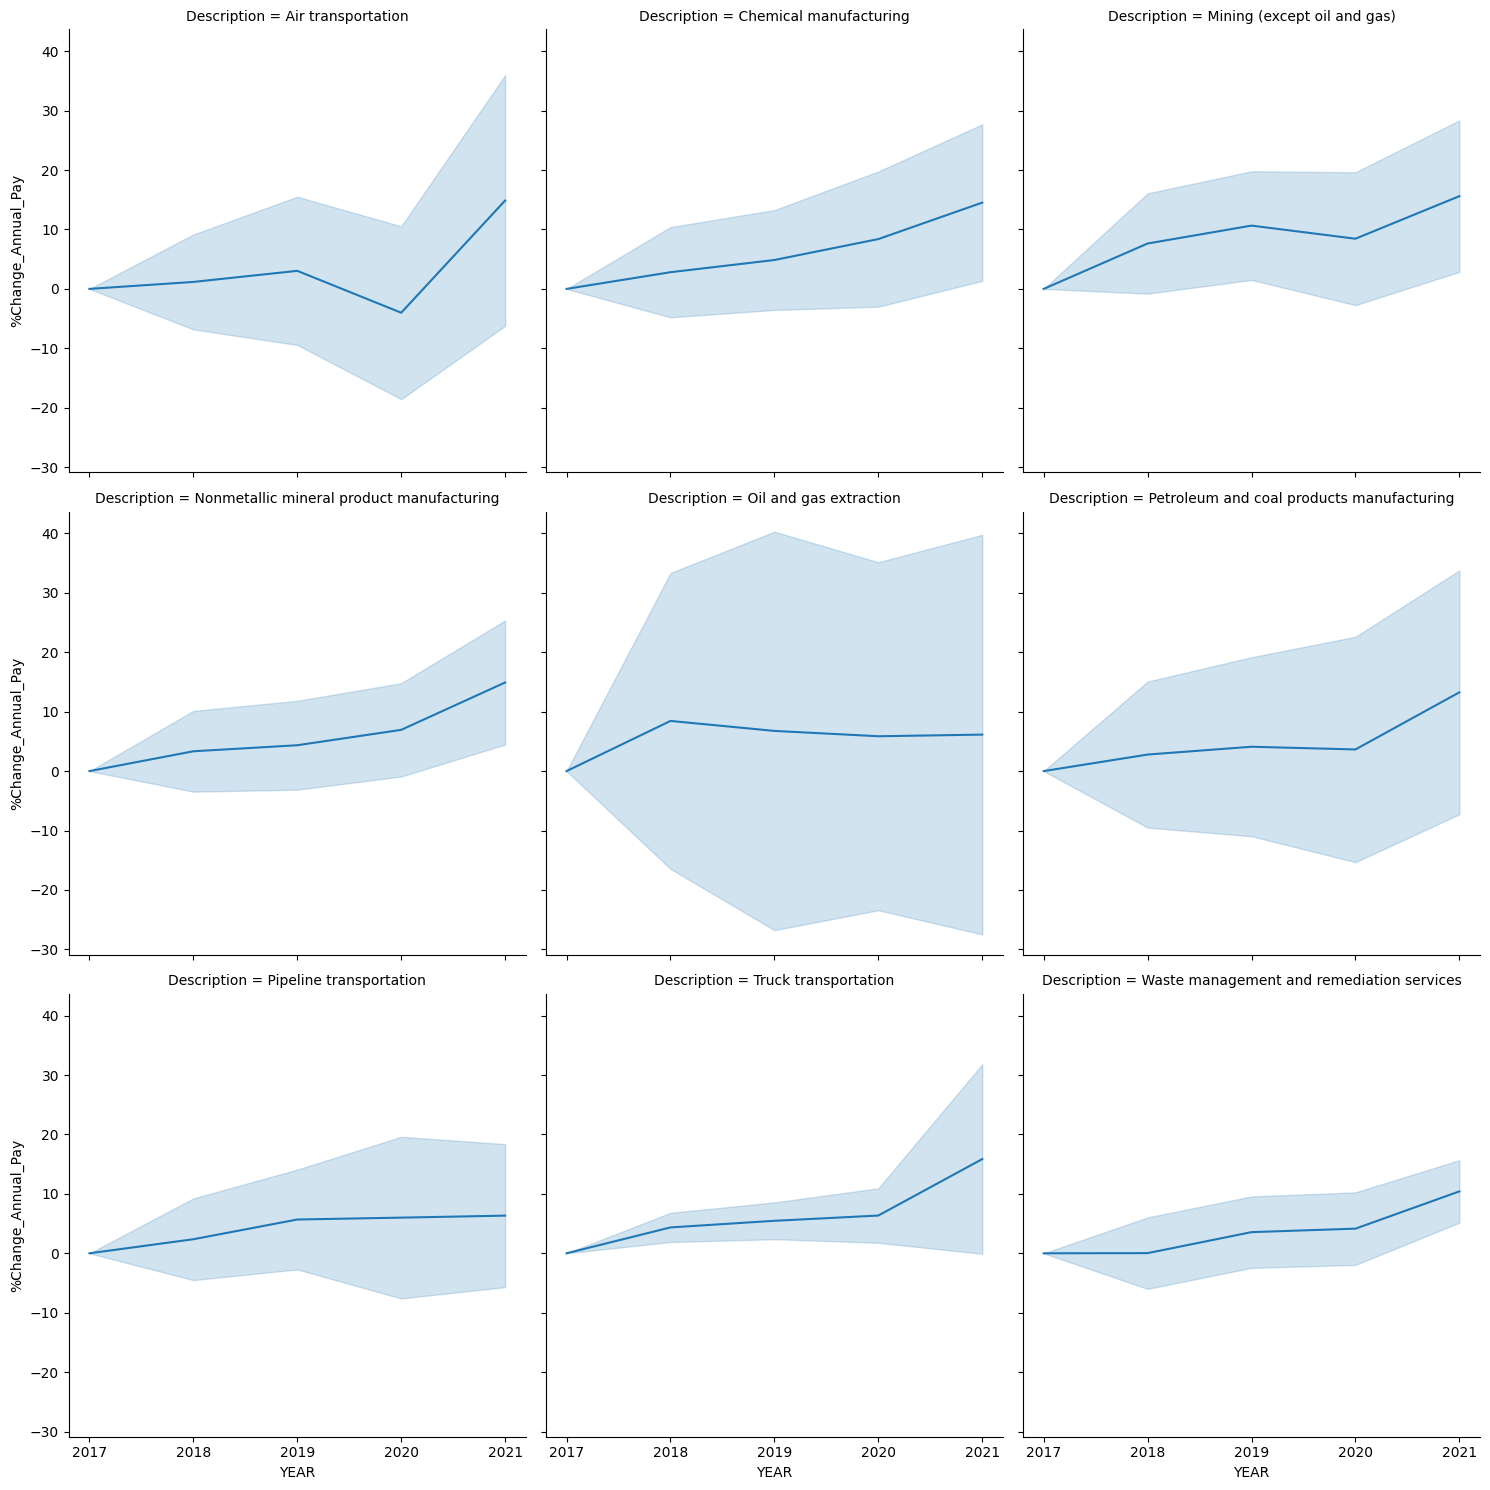

In [139]:
# Plot data
# Line is the mean of all states for each sector
# Error bar represents +/- 1 standard deviation from the mean
plot = sns.relplot(
data = p_test, kind = 'line',
x = 'YEAR', y = '%Change_Annual_Pay', errorbar = 'sd',
col = 'Description', col_wrap = 3)

In [140]:
# Prepare table of results to accompany chart
# Query DataFrame and calculate means and standard deviation
selection = p_test.query("YEAR == '2021'")
means = selection.groupby('Description').mean(numeric_only = True)
std = selection.groupby('Description').std(numeric_only = True)

# Prepare DataFrame with results
result = means.merge(std, how = 'left', on = 'Description')
result = result.rename(columns = {'%Change_Annual_Pay_x' : 'Mean_%Change_Annual_Pay', '%Change_Annual_Pay_y' : 'Stdev_%Change_Annual_Pay'})
result = result.sort_values(by = 'Mean_%Change_Annual_Pay', ascending = False)
result = result.reset_index()

# Show table
result

,Description,Mean_%Change_Annual_Pay,Stdev_%Change_Annual_Pay
0,Truck transportation,15.853465,15.944517
1,Mining (except oil and gas),15.605878,12.744274
2,Nonmetallic mineral product manufacturing,14.911487,10.441240
3,Air transportation,14.876037,21.095092
4,Chemical manufacturing,14.521016,13.170750
5,Petroleum and coal products manufacturing,13.253360,20.519620
6,Waste management and remediation services,10.416373,5.256251
7,Pipeline transportation,6.337101,12.032474
8,Oil and gas extraction,6.140338,33.620824


Observations:

All of the most polluting industries were, in general, experiencing wage growth. The top 5 were: truck transportation, mining, non-metallic mineral mfg, air transportation, and chemical mfg. The top 5 industries experienced wage growth between 14.5 to 15.8%. There was large variability in results for oil and gas extraction and petroleum and coal mfg industries. Some industries (air transportation and truck transport) show an uptick in %change from 2020 to 2021, reflecting a late-pandemic boom in transportation in goods and travel.

Inflation could be considered during this same time period to determine the magnitude of the observed increases in annual pay relative to inflation. A comparison could also be made between industry changes in annual pay versus the mean annual pay among all sectors. 

<a id='conclusions'></a>

## 4. Conclusions
### Which industries are the most polluting?
The top 5 most polluting industries on a kg/USD basis were:
*   Waste Management, 1.86
*   Pipeline Transportation, 1.57
*   Farms, 1.54
*   Truck Transportation, 1.14
*   Petroleum and Coal Mfg., 1.00

The largest average pollution factors ranged between 1 and 1.86 kg of pollution per dollar of GDP, see Fig. 1. The majority of pollution originated from greenhouse gas emissions, with air pollution and hazardous waste generally making small contributions to an industry's pollution factor. Industries with the largest pollution factors were not necessarily the largets polluters on a total emissions basis, see Fig. 2.

Interestingly, only three (farms, chemical manufacturing, and truck transport) of the ten most polluting industries, on a kg/USD basis, appeared in the overall top ten total polluters list, see Fig. 3. Real Estate was the largest total pollution emitter at 839 million metric tons of emissions. At $2.7 trillion, Real Estate was the largest industry by contribution to GDP within the economy in 2021.


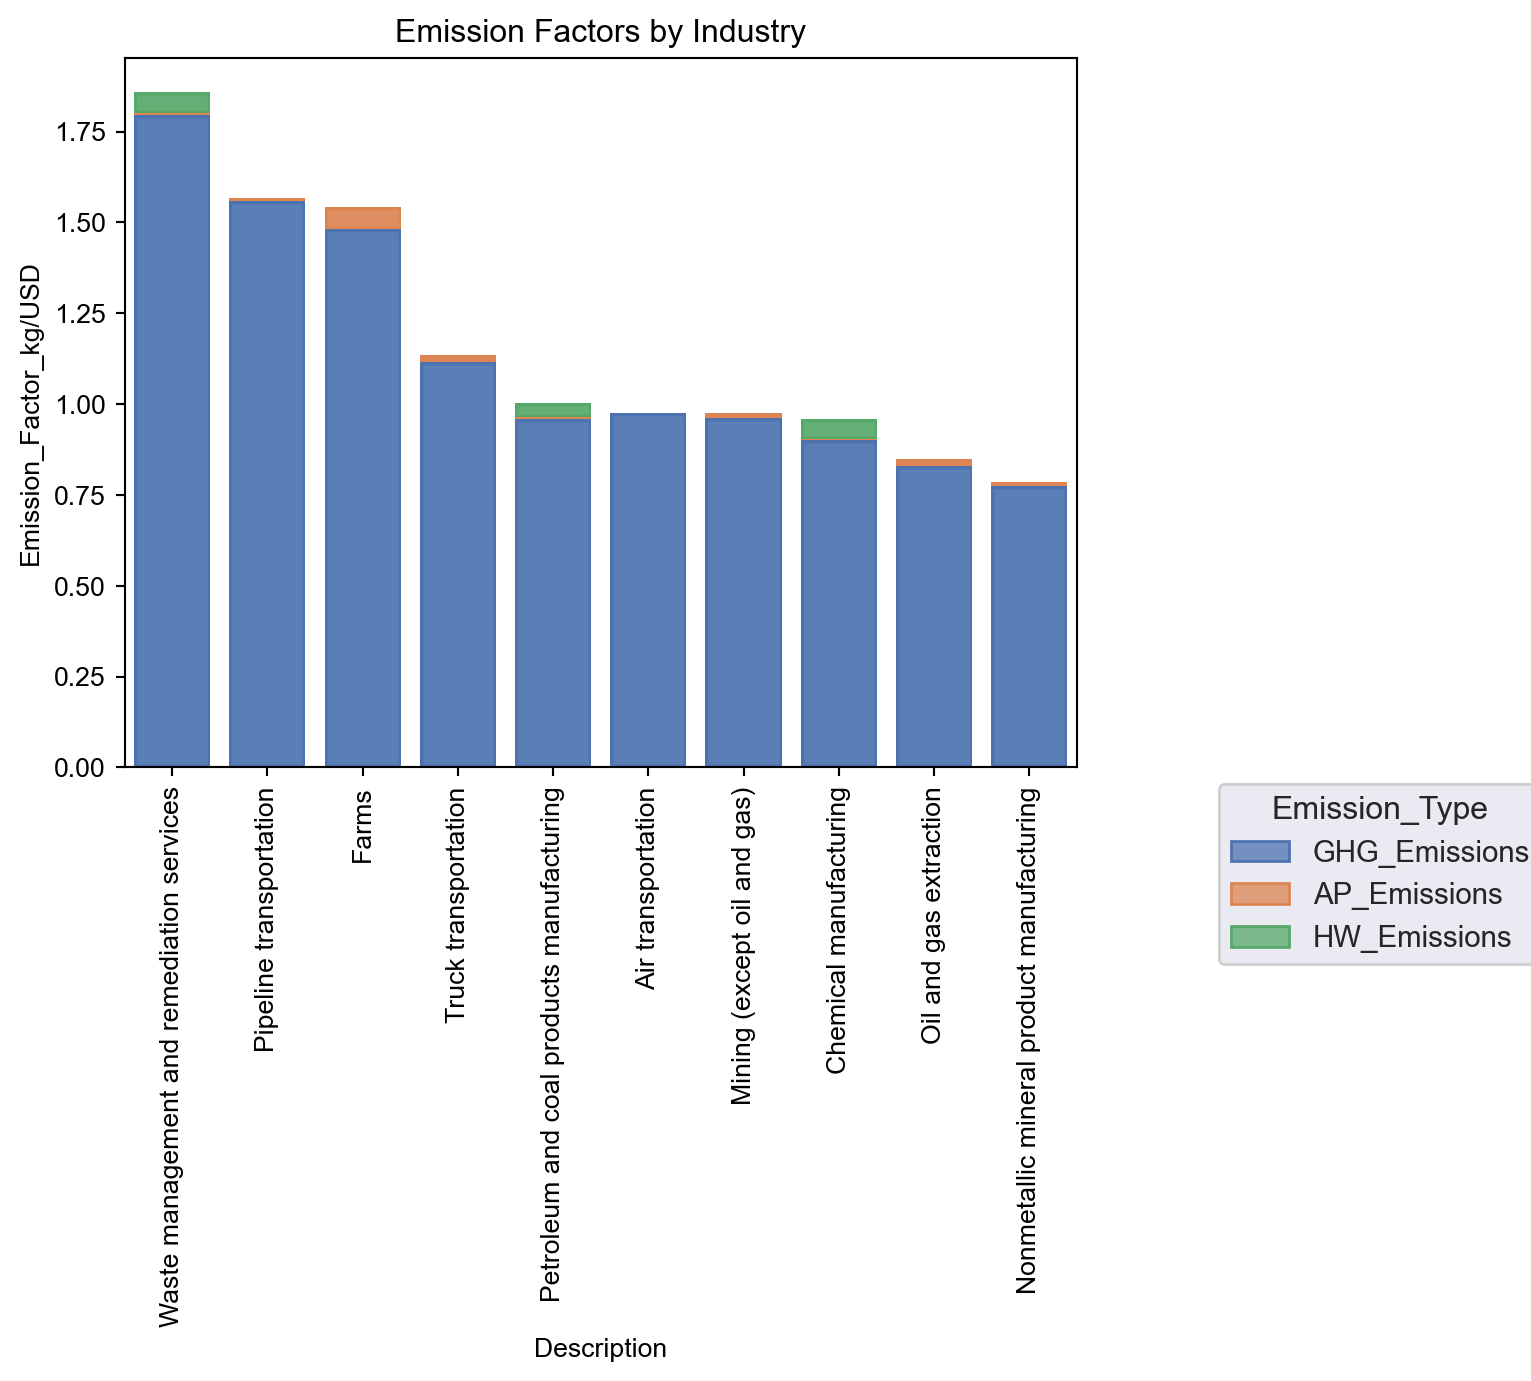

In [141]:
# Fig. 1.
plot_ef

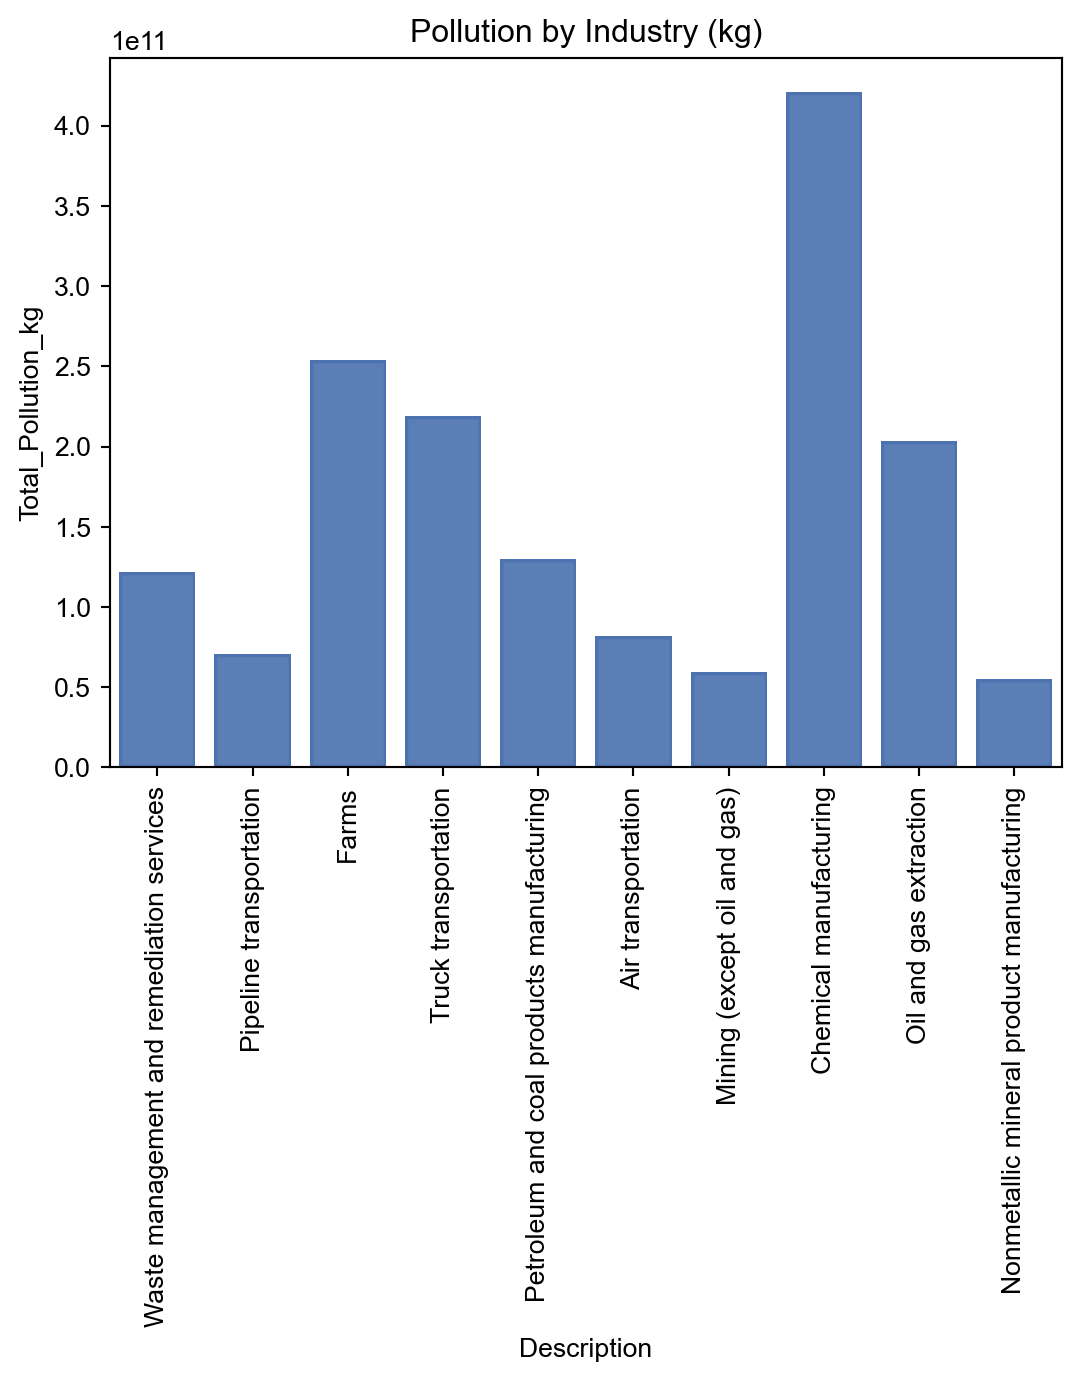

In [142]:
# Fig. 2.
plot_tp

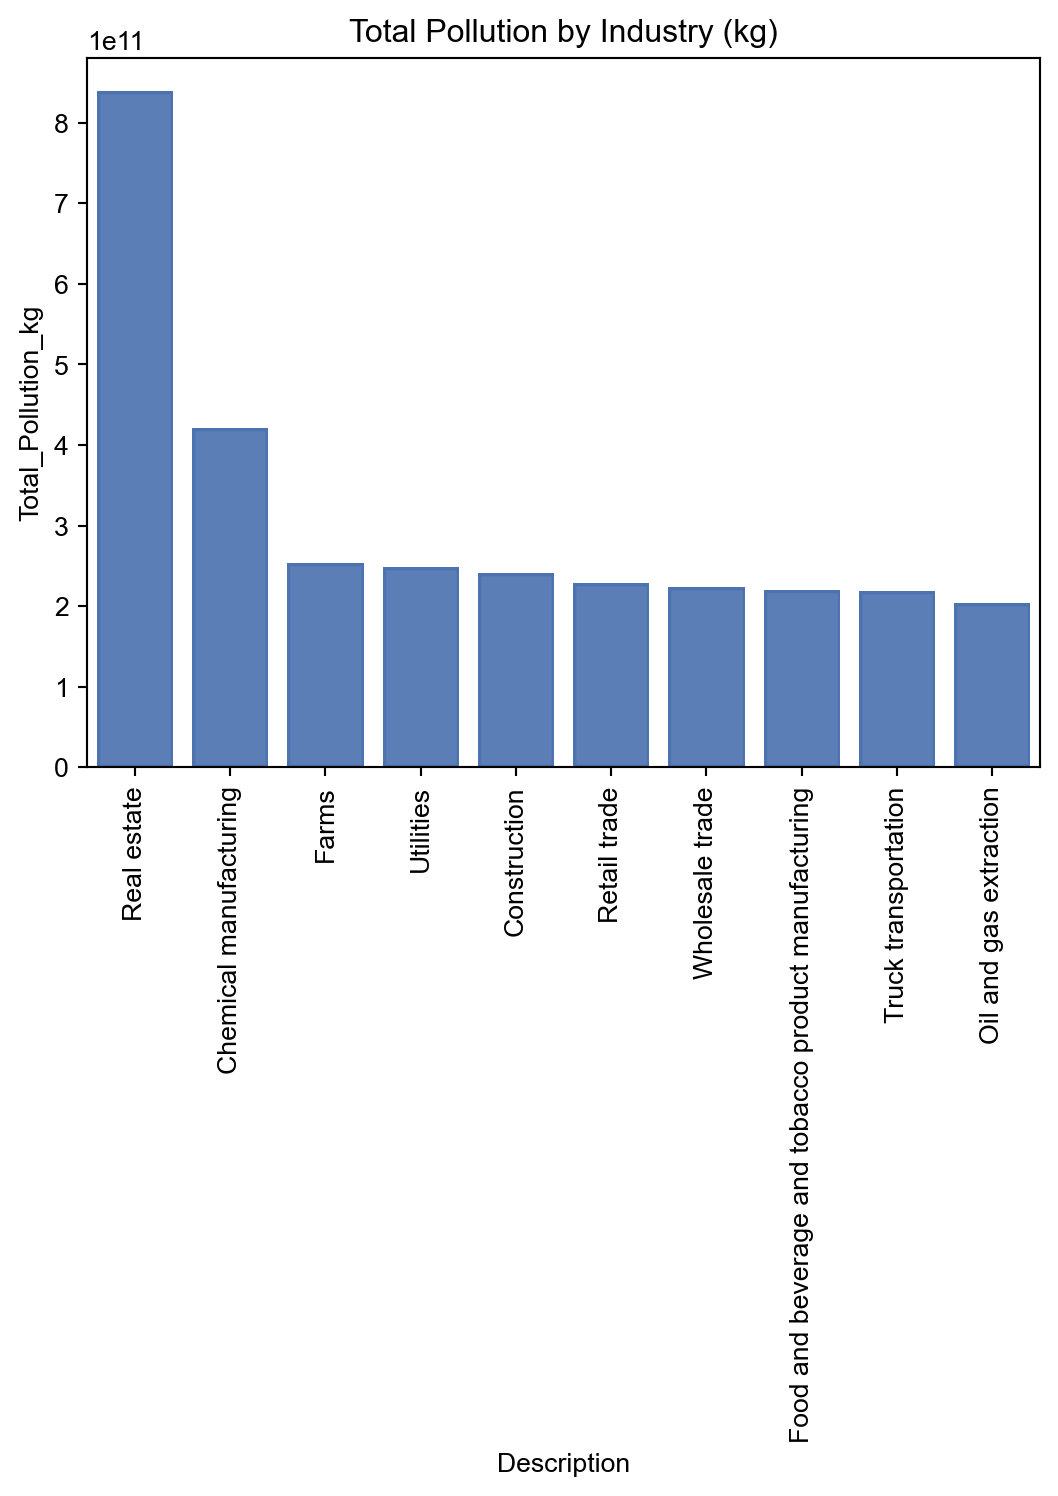

In [143]:
# Fig. 3.
plot_tot

### Which states are experiencing the largest growth in these polluting industries (as indicated by GDP)?
The top state for growth (by contribution to GDP) in each polluting industry was:
*   Waste Management: New Mexico >50%
*   Pipeline Transportation: New Hampshire >1000%
*   Farms: Illinois >80%
*   Truck Transportation: Florida > 55%
*   Petroleum and Coal Mfg: Virginia >250%

Analysis of the line charts, see Fig. 4., for the top five states in each industry reveals that states with large growth are not necessarily the states with the largest contribution to overall GDP for that sector. For example, Florida was the growth leader for truck transportation, but California truck transportation contributed >2x more to GDP.

In general, states indicated an uptick in contribution to GDP from 2020 to 2021 and is consistent with a late-pandemic boom.

Underlying reasons for these changes could be part of further study.

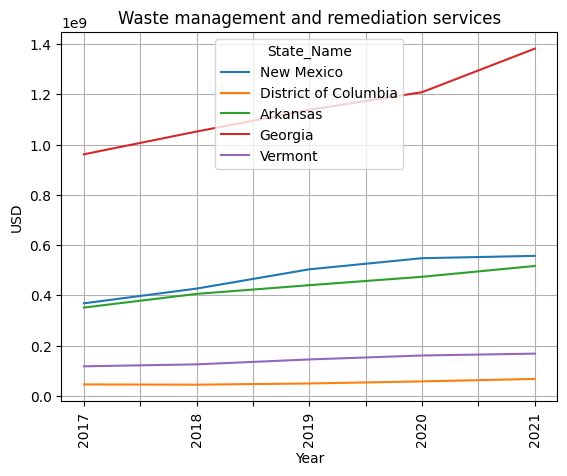

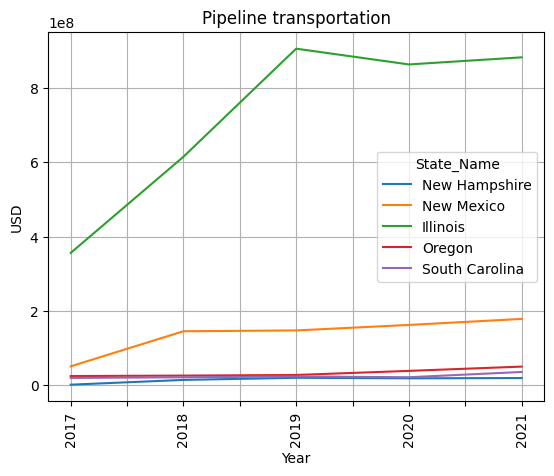

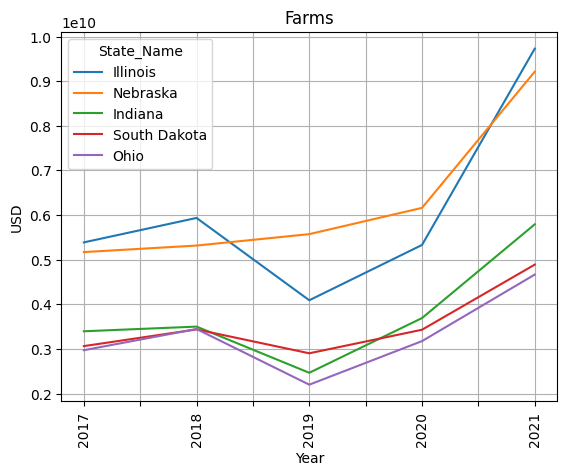

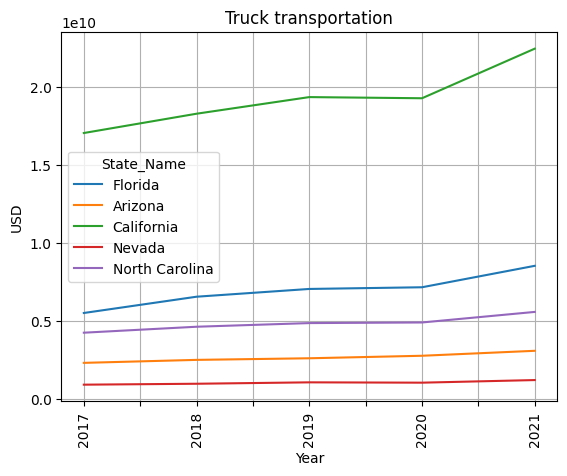

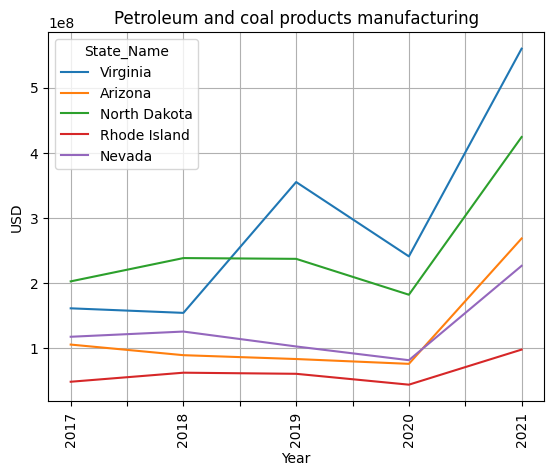

In [144]:
#Fig. 4.
# Plot WM
wm_plot = dfwm.plot.line(legend = True, rot = 90, ylabel = 'USD', grid = True, title = df0.index[0][0])
# Plot PT
pt_plot = dfpt.plot.line(legend = True, rot = 90, ylabel = 'USD', grid = True, title = df1.index[0][0])
# Plot F
f_plot = dff.plot.line(legend = True, rot = 90, ylabel = 'USD', grid = True, title = df2.index[0][0])
# Plot TT
tt_plot = dftt.plot.line(legend = True, rot = 90, ylabel = 'USD', grid = True, title = df3.index[0][0])
# Plot PCM
pcm_plot = dfpcm.plot.line(legend = True, rot = 90, ylabel = 'USD', grid = True, title = df4.index[0][0])

### Which of the most polluting industries are experiencing growing wages? Which are experiencing shrinking wages?
All of the most polluting industries were, in general, experiencing wage growth. See Fig. 5.

The top 5 for wage growth were: 
*   Truck Transportation, 15.9%
*   Mining, 15.6%
*   Non-metallic Mineral Mfg., 14.9%
*   Air Transportation, 14.9%
*   Chemical Mfg., 14.5%

The top 5 industries experienced wage growth between 14.5 to 15.8%. There was large variability in results for oil and gas extraction and petroleum and coal mfg industries. Some industries (air transportation and truck transportation) show an uptick in %change from 2020 to 2021, reflecting a late-pandemic boom in transportation of goods and travel.

Inflation could be included in future analysis to determine how the magnitude of the observed increases in annual pay compare to inflation. Alternatively, a comparison could be made between industry changes in annual pay versus the mean annual pay among all sectors. 

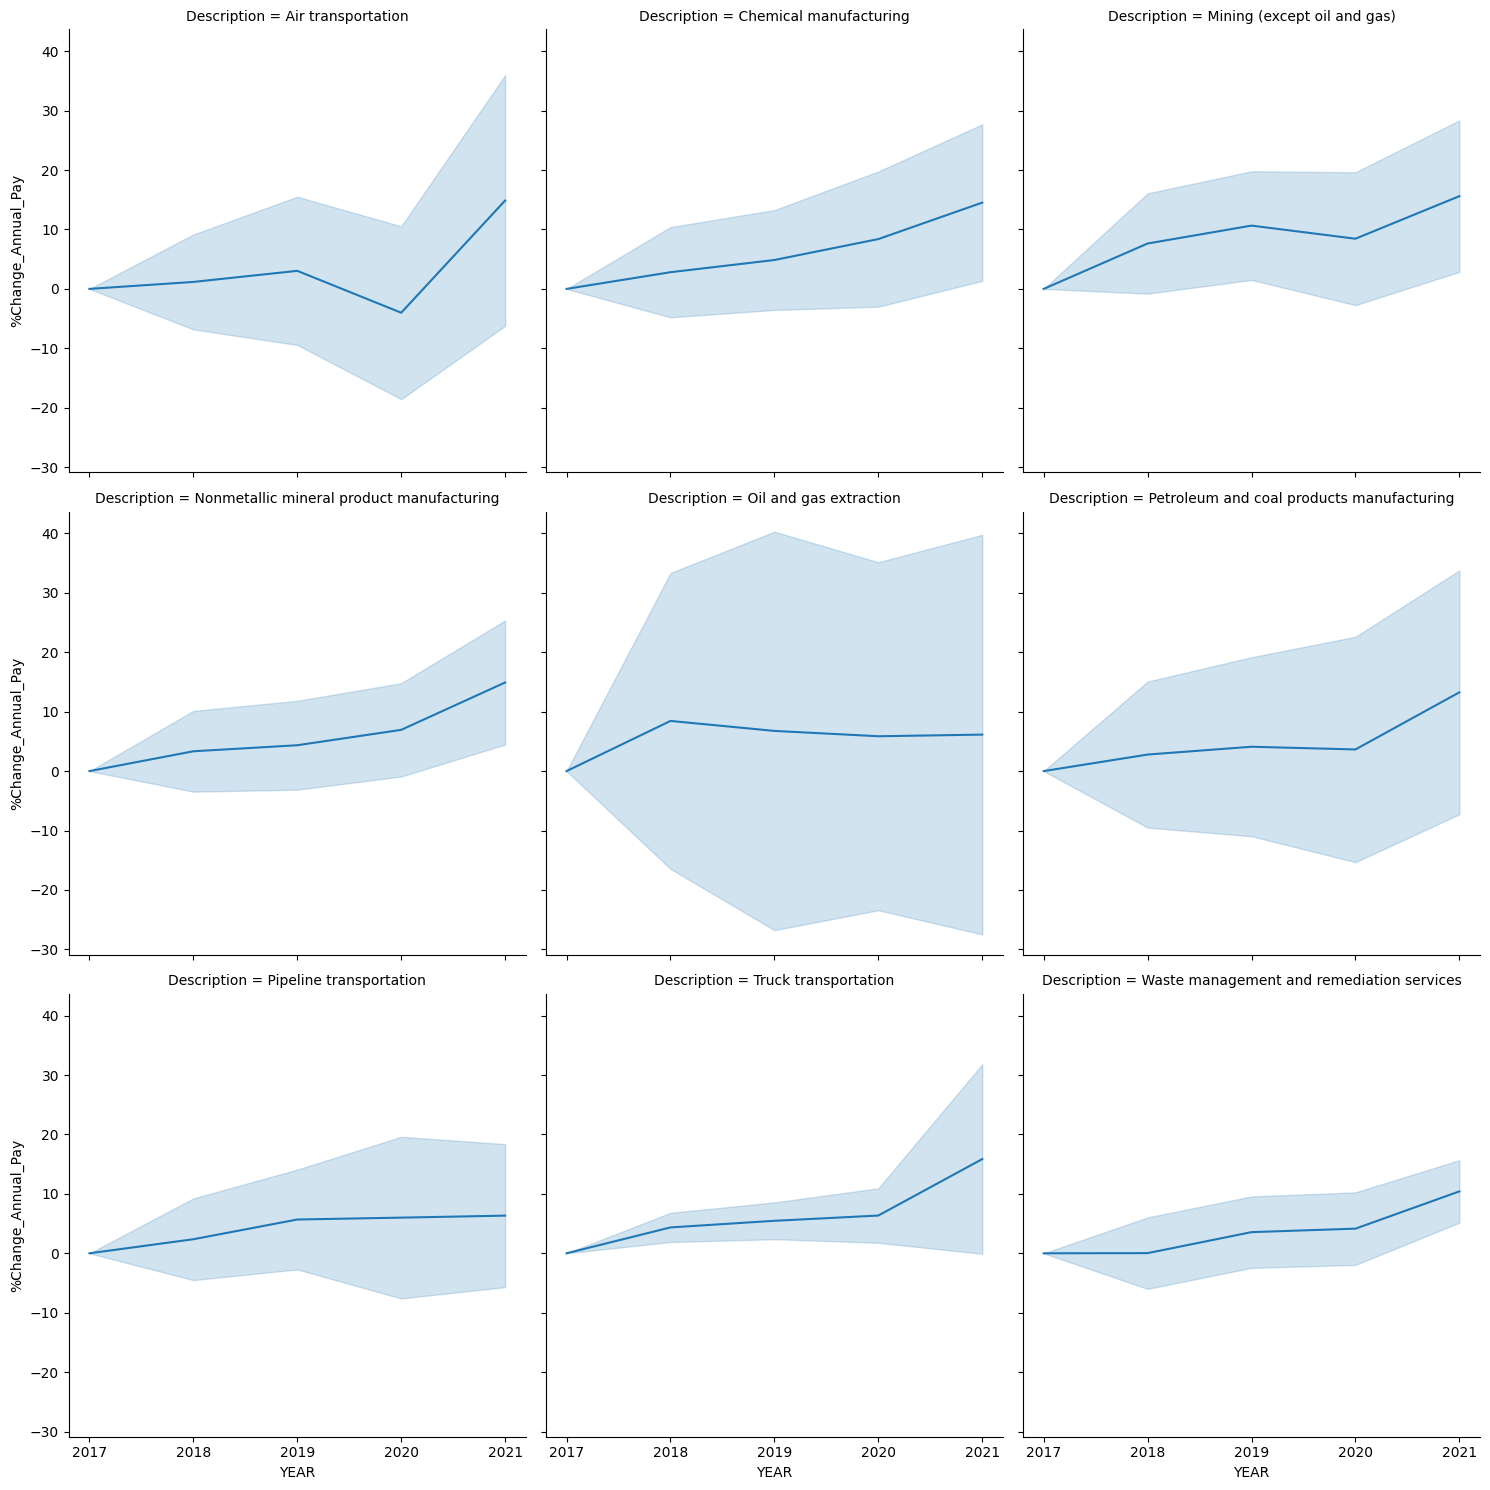

In [145]:
# Fig. 5.
# Line is the mean of all states for each sector
# Error bar represents +/- 1 standard deviation from the mean
plot = sns.relplot(
data = p_test, kind = 'line',
x = 'YEAR', y = '%Change_Annual_Pay', errorbar = 'sd',
col = 'Description', col_wrap = 3)